In [1]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import lightkurve as lk
from matplotlib import rcParams
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
rcParams["font.size"] = 11.5
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
rcParams['text.usetex'] = True
matplotlib.rc('text', usetex=True)
rcParams["text.latex.preamble"].join([r"\usepackage{dashbox}",r"\setmainfont{xcolor}",])
cmap=plt.get_cmap('viridis')
from astropy.timeseries import LombScargle
import astropy.units as u
from numpy import matrix
import pandas as pd
import statistics

tt=9    
v=np.zeros((tt))
import warnings
warnings.filterwarnings("ignore")
import scipy as sc
col=['m', 'r', 'b', 'c', 'k', 'y', 'darkred']   
addres='./'
tarnam=str(1101113865)
T=float(0.29075)
from astropy.io import ascii

Significanse test:         100.0 1323
False_Alaram_probability:  0.0
******************************************


<Figure size 640x480 with 0 Axes>

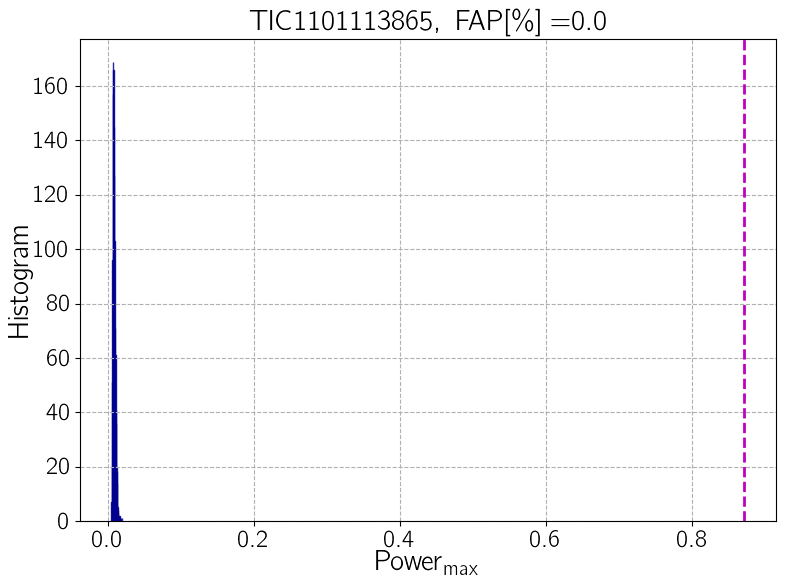

In [2]:
f1=open("./FAP.txt","r")
nm= sum(1 for line in f1)
fap=np.zeros((nm, 4))
fap=np.loadtxt("./FAP.txt")
maxp=0.8711616587829818
cdf=0.0
for i in range(nm): 
    if(fap[i,1]>maxp): cdf+=1.0
print("Significanse test:        ",  100.0-cdf*100.0/nm, nm)
print("False_Alaram_probability: ",  cdf*100.0/nm)
print("******************************************")




prob=float(cdf*100.0/nm)
plt.cla()
plt.clf()
fig=plt.figure(figsize=(8,6))
ax1=fig.add_subplot(111)
plt.hist(fap[:,1],30,histtype='bar',facecolor='blue',edgecolor='darkblue', alpha=0.85, rwidth=0.95)
plt.axvline(x=maxp, color='m', linestyle='--', lw=2.0)
plt.xlabel(r"$\rm{Power}_{\rm{max}}$",fontsize=20,labelpad=0.1)
plt.ylabel(r"$\rm{Histogram}$",fontsize=20,labelpad=0.1)
plt.title(r"$\rm{TIC}$"+str(tarnam)+r"$,~\rm{FAP[\%]}=$"+str(round(prob,2)) , fontsize=20.0)
plt.xticks(fontsize=17,rotation=0)
plt.yticks(fontsize=17,rotation=0)
ax1.grid("True")
ax1.grid(linestyle='dashed')
fig=plt.gcf()
fig.tight_layout()
fig.savefig("FAPHisto4.jpg",dpi=200)


************************************************************
search_result:   SearchResult containing 1 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 51 2022 TESS-SPOC     600  1101113865      0.0
Length data:   1101113865 1577 [0.00000000e+00 6.94441193e-03 1.38888243e-02 ... 2.45621361e+01
 2.45690803e+01 2.45760246e+01] [-0.57189458 -0.7402875  -0.62763021 ... -0.11953406 -0.19572476
 -0.1185639 ] [0.15344817 0.15433639 0.15533088 ... 0.16629045 0.16617946 0.16625801] [0. 0. 0. ... 0. 0. 0.]
Intial numbers, accepted numbers:   1577 1577
************************************************************
Number of data:   1577
Variance:   0.35059381322835553
Average error:   0.1949746555294864


<Figure size 640x480 with 0 Axes>

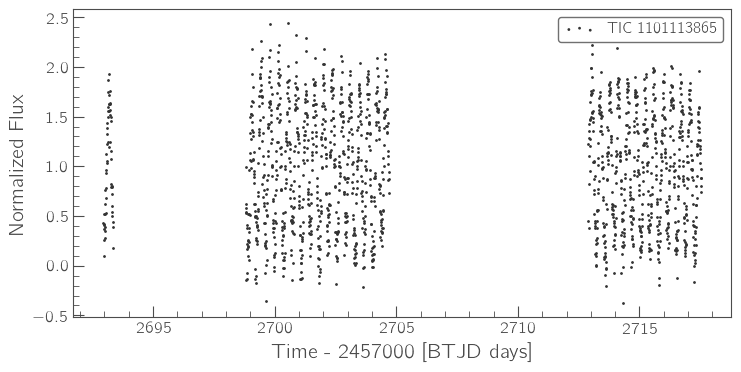

In [3]:
search_result = lk.search_lightcurve('TIC 1101113865',mission='Tess',author="TESS-SPOC")
lc_collection=search_result.download_all(flux_column='pdcsap_flux')
lc=lc_collection.stitch().normalize().flatten(window_length=901,break_tolerance=50)
lc=lc.remove_nans()
#lc=lc.remove_outliers(sigma=3.5)
lcSSA= lc.copy()
plt.cla()
plt.clf()
lc.scatter()
fig=plt.gcf()
fig.savefig(addres+'/rawdata.jpg',dpi=200)

lc.to_csv(addres+'/target'+str(tarnam)+'.csv', overwrite=True)
df=pd.read_csv(addres+'/target'+str(tarnam)+'.csv')
n0=int(len(df['time']))
dat0=np.zeros((n0,4))
dat0[:,0], dat0[:,1], dat0[:,2], dat0[:,3]=df['time'], df['flux'], df['flux_err'], df['quality']
dat0[:,0]=dat0[:,0]-dat0[0,0]
dat0[:,1]=dat0[:,1]-1.0

nd=0
dat=np.zeros((n0,4))
for i in range(n0):  
    if(dat0[i,2]>0.0 and dat0[i,3]==0): 
        dat[nd,:]=dat0[i,:]
        nd+=1

print("************************************************************")
print("search_result:  ",  search_result)
#print("lc_collection: ",    lc_collection)
print("Length data:  ", tarnam, n0, dat0[:,0], dat0[:,1], dat0[:,2], dat0[:,3])
print("Intial numbers, accepted numbers:  ",  n0, nd)
print("************************************************************")

variance = statistics.variance(dat[:nd,1])
print ("Number of data:  ",  nd)
print ("Variance:  ", variance)
print ("Average error:  ",   np.mean(np.abs(dat[:nd,2])) )
print ("==========================================================")

BLS period, t0, dur :  0.7569987975951904 d 2693.284815965789 0.2 d 0.29075 0.145375
************************************************************
[1.00000000e-06 1.00004709e-06 1.00009419e-06 ... 9.86560582e-05
 9.86561053e-05 9.86561524e-05] Hz 0.29075 0.145375 0.5815 0.87225
LS Type(T):  <class 'float'>
frequency:  3.1506527395881225e-05 Hz Hz
period (days):  0.3673548001226922 0.7347096002453845 1.1020644003680766 1.469419200490769 1.8367740006134612 2.2041288007361532 2.5714836008588455
************************************************************
0.0 24.57602456475888
0.8711616587829818


<Figure size 640x480 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 848.5x400 with 0 Axes>

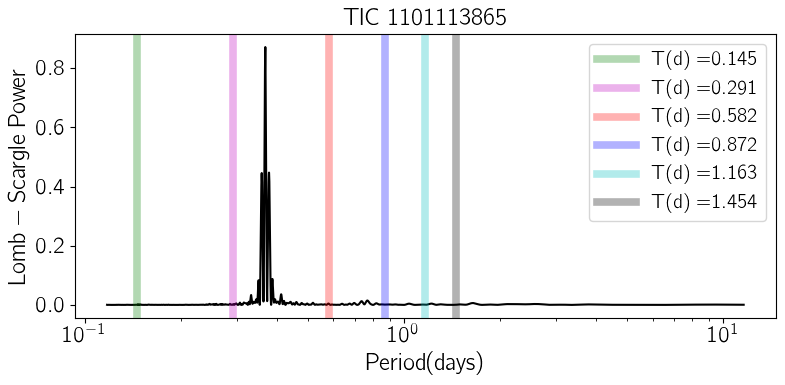

In [4]:
prange =np.linspace(T*1.4, T*30.0, 500)
lc['flux']=-lc['flux']
bls =lc.to_periodogram("bls", period=prange, frequency_factor=11000 , objective='snr')
lc['flux']=-lc['flux']
period =bls.period_at_max_power
t0 = bls.transit_time_at_max_power
dur =bls.duration_at_max_power


plt.cla()
plt.clf()
fig=plt.figure(figsize=(8,4))
bls.plot(lw=1.5, label="" )
plt.xscale('log')
plt.axvline(x =T/2.0,color='m', lw=5.5,label=r"$\rm{T}(\rm{d})=$"+str(round(T/2.,2)), alpha=0.3)
for i in range(5):
    plt.axvline(x=T*(i+1),color =col[int(i%6)],lw=5.5,label =r"$\rm{T}(\rm{d})=$"+str(round(T*(i+1),2)),alpha=0.3)    
plt.xlim([prange[0], prange[len(prange)-1] ])    
plt.xlabel(r"$\rm{Period}(\rm{days})$", fontsize=17)
plt.ylabel(r"$\rm{Depth}~\rm{SNR}$",   fontsize=17)
plt.title(r"$\rm{TIC}~$"+str(tarnam), fontsize=17)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
plt.legend()
plt.legend(prop={"size":14}, loc='best')
fig=plt.gcf()
fig.tight_layout()
fig.savefig(addres+"/BLSa{0:d}.jpg".format(int(tarnam)),dpi=200)
print("BLS period, t0, dur : ", period, t0,  dur, T, T*0.5)
print("************************************************************")



LS = LombScargle(lc['time'], lc['flux'])
frequency,power = LS.autopower(samples_per_peak=10000, minimum_frequency=1e-6*u.Hz, maximum_frequency=1e-4*u.Hz)
best_frequency = frequency[np.argmax(power)]
periodl=float(1.0/best_frequency.value/(3600.0*24.0))
print (frequency, T, T*0.5, T*2.0, T*3)
plt.cla()
plt.clf()
fig=plt.figure(figsize=(8,4))
plt.plot(1.0/frequency/(3600.0*24.0), power, "k-", lw=1.5)
plt.axvline(x =T*0.5,color='g', lw=5.5,label=r"$\rm{T}(\rm{d})=$"+str(round(T/2.,3)),alpha=0.3)
for i in range(5):
    plt.axvline(x=T*(i+1),color=col[int(i%6)],lw=5.5,label =r"$\rm{T}(\rm{d})=$"+str(round(T*(i+1),3)),alpha=0.3)  
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.legend(prop={"size":14}, loc='best')
plt.xlabel(r"$\rm{Period}(\rm{days})$", fontsize=17)
plt.ylabel(r"$\rm{Lomb}-\rm{Scargle}~\rm{Power}$",fontsize=17)
plt.title(r"$\rm{TIC}~$"+str(tarnam), fontsize=17)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16, rotation=0)
#plt.xlim(0.15,3.)
fig=plt.gcf()
fig.tight_layout()
fig.savefig(addres+"/LombSa{0:d}.jpg".format(int(tarnam)),dpi=200)
print("LS Type(T): ",   type(periodl))
print("frequency: ", best_frequency, best_frequency.unit)
print("period (days): ",    periodl  , periodl*2, periodl*3, periodl*4, periodl*5, periodl*6, periodl*7)
print("************************************************************")
print(np.min(dat[:nd,0]),   np.max(dat[:nd,0]))
maxp=np.max(power)
print (maxp)

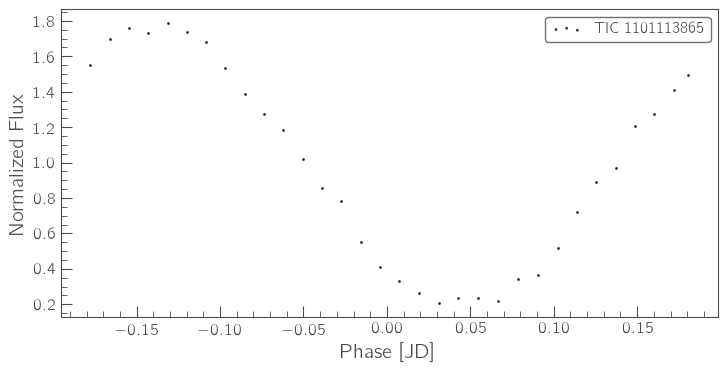

In [5]:
ax = lc.fold(period=0.3673548001226922).bin(binsize=50).scatter()
plt.show()

In [ ]:
cdf=0.0
flu=np.zeros((nd))
print(maxp)

dist=np.zeros((1000))
save=open("./FAP.txt","a+")      
save.close()
for i in range(1000): 
    for j in range(nd): 
        flu[j] = np.random.normal(0.0,dat[j,2],1)
        lcSSA['flux'][j]=flu[j]
    print(flu)
    ##################################################
    plt.clf()
    plt.cla()
    fig=plt.figure(figsize=(8,6))
    plt.errorbar(dat[:nd,0],flu, yerr=dat[:nd,2],fmt=".",markersize=10.8,color='m',ecolor='gray',elinewidth=0.8, capsize=0)
    plt.xticks(fontsize=16, rotation=0)
    plt.yticks(fontsize=16, rotation=0)
    fig=plt.gcf()
    fig.tight_layout()
    fig.savefig(addres+"/Copy{0:d}.jpg".format(int(i)),dpi=200)  
    ##################################################
    LS = LombScargle(lcSSA['time'], lcSSA['flux'])
    frequency,power = LS.autopower(samples_per_peak=10000, minimum_frequency=1e-6*u.Hz, maximum_frequency=1e-4*u.Hz)
    best_frequency = frequency[np.argmax(power)]
    periodl=float(1.0/best_frequency.value/(3600.0*24.0))
    print(np.max(power),   periodl, best_frequency)
    ###################################################
    plt.cla()
    plt.clf()
    fig=plt.figure(figsize=(8,4))
    plt.plot(1.0/frequency/(3600.0*24.0), power, "k-", lw=1.5)
    plt.xscale('log')
    plt.legend()
    plt.legend(prop={"size":14}, loc='best')
    plt.xlabel(r"$\rm{Period}(\rm{days})$", fontsize=17)
    plt.ylabel(r"$\rm{Lomb}-\rm{Scargle}~\rm{Power}$",fontsize=17)
    plt.title(r"$\rm{TIC}~$"+str(tarnam), fontsize=17)
    plt.xticks(fontsize=16, rotation=0)
    plt.yticks(fontsize=16, rotation=0)
    plt.xlim(0.05,3.)
    fig=plt.gcf()
    fig.tight_layout()
    fig.savefig(addres+"/periodgram{0:d}.jpg".format(int(i)),dpi=200)
    ###################################################
    dist[i]=float( np.max(power))
    test=np.array([i, dist[i],  periodl , np.mean(flu) ])
    save=open("./FAP.txt","a+")      
    np.savetxt(save,test.reshape(-1,4), fmt='%d    %.10f   %.10f   %.10f')
    save.close() 
    if(dist[i]<maxp): cdf+=1.0
    print ("Significanse test: ",   cdf)
    print("******************************************")

0.8711616587829818
[-0.00705775 -0.19140287 -0.42622829 ...  0.05167363  0.14044954
  0.04076398]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008474167738015107 0.3957137040923601 2.9248605631743976e-05 Hz
Significanse test:  1.0
******************************************
[-0.05351489  0.23568225 -0.26660761 ... -0.17507971  0.08474915
 -0.00090829]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.01006541437815893 1.9292762329751345 5.999179317222867e-06 Hz
Significanse test:  2.0
******************************************
[-0.08142713  0.08480381  0.25849306 ...  0.02880217  0.42824261
 -0.11740234]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.011972069072377777 0.15030658994807725 7.700310464146839e-05 Hz
Significanse test:  3.0
******************************************
[-0.05774278 -0.0494057  -0.22461162 ...  0.15148487  0.06148721
  0.00998993]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006187524159027578 0.41467626443964906 2.7911108174262375e-05 Hz
Significanse test:  4.0
******************************************
[ 0.04992714 -0.28665643  0.00364521 ... -0.03590433  0.35103015
 -0.33589259]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007435411092678228 0.27125594892817234 4.266846172335505e-05 Hz
Significanse test:  5.0
******************************************
[ 0.16965638 -0.1874263  -0.12191748 ...  0.18725059  0.06019738
 -0.03550795]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007131982574500322 0.2686286906396171 4.308577034908549e-05 Hz
Significanse test:  6.0
******************************************
[-0.08567831  0.11977742  0.18301472 ...  0.1520297  -0.07272223
  0.11934895]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.010002495470671877 0.7342204651685286 1.5763758466494707e-05 Hz
Significanse test:  7.0
******************************************
[ 0.15828951 -0.13082422 -0.14184335 ...  0.21472916 -0.01920229
 -0.29803083]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008360120206136433 0.4190144880708476 2.7622133371476912e-05 Hz
Significanse test:  8.0
******************************************
[ 0.08939425 -0.064318   -0.08882716 ... -0.16501035  0.15331874
 -0.07450179]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008213791031921335 0.2752784393501665 4.2044971271256496e-05 Hz
Significanse test:  9.0
******************************************
[ 0.03391943 -0.28888483  0.29371522 ...  0.22982721  0.00588513
  0.06914766]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0066655116464830995 0.22252593750649582 5.2012247218310055e-05 Hz
Significanse test:  10.0
******************************************
[ 0.11737724  0.01600231 -0.0606208  ...  0.03968493  0.08090446
  0.21327846]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.012460599673742878 0.11864246976174816 9.755422402548216e-05 Hz
Significanse test:  11.0
******************************************
[ 0.1083393  -0.13225255  0.06048806 ... -0.23204592  0.15788527
 -0.06394297]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009681693425646402 0.8219194950240778 1.4081761223749799e-05 Hz
Significanse test:  12.0
******************************************
[ 0.02675264 -0.17561816 -0.12483554 ... -0.35321929  0.11190224
  0.32424803]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009250836098467502 0.32029238429292306 3.613596401807986e-05 Hz
Significanse test:  13.0
******************************************
[ 0.21127836 -0.1818997  -0.05252231 ...  0.29072225  0.30433165
 -0.13646977]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008828456692636199 0.19290341918762205 5.9999320503577385e-05 Hz
Significanse test:  14.0
******************************************
[-0.29110406  0.15349328 -0.20226112 ...  0.06836969 -0.00692235
 -0.09413949]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008714224915063589 0.14272564695666137 8.109316244745095e-05 Hz
Significanse test:  15.0
******************************************
[-0.15671209 -0.10681883  0.05838439 ...  0.28227216  0.00966253
  0.30719808]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006334169383492549 0.20167728485302389 5.738908118734789e-05 Hz
Significanse test:  16.0
******************************************
[ 0.18600279 -0.03258807  0.13549899 ...  0.31366563  0.13050804
  0.00853103]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009834820983761778 0.41738414708645255 2.773002797271249e-05 Hz
Significanse test:  17.0
******************************************
[-0.2627337  -0.23282614 -0.02137516 ... -0.04856758 -0.062995
  0.10091718]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008140505065435481 0.1518075262697632 7.62417671802836e-05 Hz
Significanse test:  18.0
******************************************
[-0.11949014  0.08935722 -0.11983202 ... -0.06566971 -0.18863653
 -0.11527385]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006715874136173707 0.603393679750813 1.9181629610130963e-05 Hz
Significanse test:  19.0
******************************************
[-0.02880844  0.06515874 -0.01049616 ...  0.05163551  0.02037149
 -0.30937862]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009071742433514706 0.18044194304249483 6.41429253028401e-05 Hz
Significanse test:  20.0
******************************************
[ 0.04812247  0.04736691  0.24630044 ... -0.24978185  0.35178777
 -0.11340936]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006893867430132415 0.16982623451748552 6.815245069148838e-05 Hz
Significanse test:  21.0
******************************************
[ 0.06655075 -0.23490858  0.10201018 ... -0.12064383 -0.04820602
  0.02938933]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00846601118241194 0.12580408107622373 9.200078387807969e-05 Hz
Significanse test:  22.0
******************************************
[-0.03831653  0.02363008 -0.02870121 ... -0.19064996  0.18478255
 -0.06196248]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008497096926646451 0.129028682420402 8.970155981569555e-05 Hz
Significanse test:  23.0
******************************************
[-0.01587638  0.20218255  0.12615434 ...  0.00408282  0.04492436
 -0.40853107]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00756557656338162 0.1399133340443737 8.27231668312853e-05 Hz
Significanse test:  24.0
******************************************
[ 0.34017426  0.09817251 -0.3180497  ... -0.10305212 -0.26124167
 -0.05062568]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.005735325338825967 0.2050054347546081 5.6457401180257795e-05 Hz
Significanse test:  25.0
******************************************
[-0.1321545  -0.0737387   0.05634094 ... -0.01449332 -0.20855064
  0.20501581]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009319940382253984 0.11731730656284313 9.865615238851577e-05 Hz
Significanse test:  26.0
******************************************
[ 0.28905307 -0.17054618  0.17703729 ...  0.20852836 -0.03814416
 -0.07932298]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008672219746960403 0.16876869512890552 6.857950797826455e-05 Hz
Significanse test:  27.0
******************************************
[ 0.1768364  -0.01596923  0.01546096 ... -0.18063831  0.17888968
 -0.17681034]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007500093853118084 0.12036422848184082 9.615875264651606e-05 Hz
Significanse test:  28.0
******************************************
[-0.16253408 -0.21391746 -0.05687907 ... -0.23971149  0.17275655
 -0.02148303]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.01117125022764347 0.2566757180278076 4.509220491523148e-05 Hz
Significanse test:  29.0
******************************************
[-0.12600006  0.09104761 -0.13062657 ... -0.16912249 -0.0620756
  0.19118496]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.005851469869389241 0.11749999289233544 9.850276403573344e-05 Hz
Significanse test:  30.0
******************************************
[ 0.0374581  -0.07605088 -0.04480594 ... -0.01269105 -0.05451387
 -0.00356009]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006548948094437758 0.1936901864207557 5.975560397743417e-05 Hz
Significanse test:  31.0
******************************************
[-0.01063854  0.30688349  0.1015713  ...  0.03979068 -0.16890087
  0.02022901]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008906837841158982 0.14124592953368917 8.194270880785625e-05 Hz
Significanse test:  32.0
******************************************
[ 0.01181379  0.16218233  0.07272774 ... -0.15780428 -0.13761242
  0.03131954]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009883520185711411 0.1624780898744194 7.123467590627e-05 Hz
Significanse test:  33.0
******************************************
[ 0.17552438  0.09883416 -0.1302273  ...  0.21303335  0.08904473
  0.00080246]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006045094592956181 0.17778365457930162 6.510201458881238e-05 Hz
Significanse test:  34.0
******************************************
[ 0.1593325  -0.05199333 -0.20058441 ...  0.08547416 -0.22256535
  0.04641221]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.012858879191006067 0.1932661326085377 5.9886716404252086e-05 Hz
Significanse test:  35.0
******************************************
[-0.01094899  0.05411961 -0.11630375 ...  0.01882342 -0.14690994
 -0.0299021 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.012769361793761761 0.5323718478217443 2.1740582492163365e-05 Hz
Significanse test:  36.0
******************************************
[-0.07657551 -0.15051971  0.08773266 ... -0.09755153  0.06200101
  0.2092075 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.005317573241488528 0.1307951462895213 8.849008852709496e-05 Hz
Significanse test:  37.0
******************************************
[-0.09594866 -0.05181111  0.05132927 ...  0.13980182 -0.30403582
 -0.12195949]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009645764850347394 1.8657963767990895 6.203288964431503e-06 Hz
Significanse test:  38.0
******************************************
[ 0.10441298  0.19053621 -0.13193579 ...  0.11077786 -0.09657391
 -0.12162367]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006299517284825941 0.17675307338611088 6.548160013484414e-05 Hz
Significanse test:  39.0
******************************************
[-0.08225817 -0.20260959  0.02624464 ...  0.1158342  -0.01093445
  0.13721348]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008716693058104106 0.35245677705669803 3.283827926569336e-05 Hz
Significanse test:  40.0
******************************************
[ 0.17577917  0.15564639  0.07929314 ... -0.17158005 -0.12486098
 -0.06590502]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006849592206959536 0.2873280910193608 4.0281735186463854e-05 Hz
Significanse test:  41.0
******************************************
[-0.0778266  -0.21405269  0.04415082 ... -0.03528033  0.02902345
 -0.18020957]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009421912697807696 4.119575949032416 2.809530451014632e-06 Hz
Significanse test:  42.0
******************************************
[ 0.14150082 -0.02845008  0.23072168 ...  0.02327756 -0.09746411
  0.03955188]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009813001843713247 0.24892591486281504 4.649605920079729e-05 Hz
Significanse test:  43.0
******************************************
[-0.27687005  0.03703914 -0.06009484 ... -0.04444366  0.00150491
 -0.0652965 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007513855432111085 0.34283706971329403 3.375969256694785e-05 Hz
Significanse test:  44.0
******************************************
[ 0.03577766 -0.17069148  0.14640955 ...  0.10016151 -0.08070437
 -0.07699248]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008168326048390708 0.13932139263553647 8.307463667372139e-05 Hz
Significanse test:  45.0
******************************************
[-0.07641796  0.10842003 -0.08276468 ...  0.01661705  0.22100111
  0.18846976]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00890342403748611 0.20863426171669486 5.547542373356945e-05 Hz
Significanse test:  46.0
******************************************
[ 0.01489214  0.00477504 -0.01114805 ... -0.39852589 -0.14767515
 -0.06749395]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008714838707240219 0.24284232866727146 4.7660859363328715e-05 Hz
Significanse test:  47.0
******************************************
[ 0.22967105 -0.14552553 -0.08999705 ... -0.10552118 -0.17365762
 -0.15168195]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0077995905027570915 0.3538166781657946 3.271206471688876e-05 Hz
Significanse test:  48.0
******************************************
[-0.15156127 -0.15146754 -0.08472428 ...  0.00838626  0.05134647
  0.17439449]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009650802376016893 0.13028357247663974 8.883755529615479e-05 Hz
Significanse test:  49.0
******************************************
[ 0.27461017  0.10277936  0.01275106 ... -0.26237688 -0.04223886
 -0.14772833]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009435389752800845 0.19703336532420185 5.8741696133697506e-05 Hz
Significanse test:  50.0
******************************************
[0.05070964 0.15001208 0.22179646 ... 0.06306295 0.06830689 0.01125487]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008251807433157465 0.15194220902993952 7.617418588269607e-05 Hz
Significanse test:  51.0
******************************************
[ 0.10499902 -0.03017641 -0.08286276 ...  0.32595345 -0.12500129
  0.04682546]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006901515178022767 3.108776585827379 3.7230317954783864e-06 Hz
Significanse test:  52.0
******************************************
[ 0.23588247  0.15609577  0.15091518 ... -0.21757551  0.26984733
  0.26372666]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.010504512674384807 0.2771147594493318 4.176635736426843e-05 Hz
Significanse test:  53.0
******************************************
[-1.02739073e-01  1.31967860e-04 -1.86093196e-01 ...  2.63729501e-01
  9.77229010e-02 -1.79165336e-01]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.010268712811062067 1.609224411949254 7.192330658254429e-06 Hz
Significanse test:  54.0
******************************************
[ 0.06241417  0.04711516 -0.15853363 ... -0.07578551 -0.09250128
 -0.07699975]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007668546943662369 0.9573805595149923 1.2089313866930288e-05 Hz
Significanse test:  55.0
******************************************
[-5.25120788e-01 -2.45184868e-01  1.49811959e-01 ...  1.71937766e-02
 -3.10266512e-04  8.59891522e-02]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008129104960378549 2.5784631402434806 4.4887490898866025e-06 Hz
Significanse test:  56.0
******************************************
[-0.08479781  0.11013145 -0.00305538 ...  0.3245778  -0.04922891
  0.13842379]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009183463328652997 0.16268513345710273 7.114401806804283e-05 Hz
Significanse test:  57.0
******************************************
[-0.29441138 -0.24880199  0.303581   ... -0.08881254  0.00096407
  0.01171092]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008623455456621736 0.19912825454969235 5.8123715794363925e-05 Hz
Significanse test:  58.0
******************************************
[ 0.00685897  0.04136505 -0.23927757 ...  0.13106797 -0.20886797
 -0.11500154]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006014068082783633 0.47932111210743034 2.4146806351146023e-05 Hz
Significanse test:  59.0
******************************************
[-0.07644951 -0.07862224  0.19771325 ...  0.08663337  0.14347995
  0.17978788]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006858160160201333 0.6467465341067832 1.789584244167453e-05 Hz
Significanse test:  60.0
******************************************
[-0.0328684   0.0013321   0.20460713 ...  0.19503155 -0.24680131
  0.02686164]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007082891637598385 0.3534523350686425 3.274578472321118e-05 Hz
Significanse test:  61.0
******************************************
[-0.00465389  0.0795942   0.14201138 ...  0.0337461   0.13485931
  0.2019914 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006611024889868866 0.16963036214351604 6.823114640456766e-05 Hz
Significanse test:  62.0
******************************************
[-0.07318977  0.38325927  0.15091281 ... -0.06325482  0.26788374
  0.06755879]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008278557148281001 0.6370779034338626 1.816743919650891e-05 Hz
Significanse test:  63.0
******************************************
[-0.04598282 -0.08585434 -0.19613393 ...  0.05567088  0.10782238
  0.03802093]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.011564448211184079 0.4741169063771767 2.4411856903635686e-05 Hz
Significanse test:  64.0
******************************************
[ 0.25940246 -0.0569314  -0.05064781 ... -0.19265131 -0.07880619
  0.23810035]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009814607785547071 0.2849652900179224 4.061573279098707e-05 Hz
Significanse test:  65.0
******************************************
[ 0.14445862 -0.23981343 -0.23526937 ...  0.03459731  0.13497125
 -0.25493722]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007542369222287593 0.139087763635455 8.321417910211991e-05 Hz
Significanse test:  66.0
******************************************
[ 0.02042058  0.09032351  0.09923708 ...  0.22049278 -0.1927951
 -0.14347396]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007337765042468827 0.322737416709146 3.586220089412421e-05 Hz
Significanse test:  67.0
******************************************
[-0.0968281  -0.00703397  0.09502838 ...  0.3302376   0.14988282
 -0.04996286]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.011792530847188698 0.3523304534768162 3.285005301091767e-05 Hz
Significanse test:  68.0
******************************************
[-0.19164657  0.04023289 -0.17242856 ...  0.09915806 -0.01526118
  0.07359185]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007929103214615398 0.7592112714635632 1.524486596696892e-05 Hz
Significanse test:  69.0
******************************************
[ 0.08134503  0.28237809  0.27237135 ... -0.028906   -0.12101055
 -0.01077484]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007254365812391198 0.344553486054091 3.359151639016381e-05 Hz
Significanse test:  70.0
******************************************
[-0.34919105  0.34262567  0.05092481 ... -0.21074572 -0.09192052
  0.00363942]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006841182355844281 1.3537698541457646 8.549513817751076e-06 Hz
Significanse test:  71.0
******************************************
[-0.1653988  -0.03982423  0.05508709 ... -0.09895879 -0.30387652
  0.18064495]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006892355774706921 0.4127131710983834 2.8043868925411694e-05 Hz
Significanse test:  72.0
******************************************
[ 0.19900862 -0.16642492 -0.01259524 ...  0.15203244  0.33762427
 -0.16932013]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009113036777584115 0.13359826506260658 8.663341600020219e-05 Hz
Significanse test:  73.0
******************************************
[ 0.10286289  0.03045537 -0.05150404 ...  0.00915963 -0.00064428
 -0.11530622]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.010171179366916215 0.11988435162929126 9.65436599253892e-05 Hz
Significanse test:  74.0
******************************************
[-0.14479452 -0.06212184 -0.27563698 ...  0.05399343  0.0942417
  0.05107287]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006853084104204299 3.433379804321263 3.3710439082524184e-06 Hz
Significanse test:  75.0
******************************************
[-0.08337769  0.0671861   0.12979028 ... -0.06200679  0.01260486
 -0.05587136]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008121723699549785 0.14057575008106313 8.233336167439884e-05 Hz
Significanse test:  76.0
******************************************
[ 0.05499993  0.16333342  0.00534754 ... -0.18424287 -0.2076183
 -0.13172486]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008145871254745533 0.28016933011643314 4.131099599397302e-05 Hz
Significanse test:  77.0
******************************************
[-0.22582168 -0.06268625 -0.22440777 ... -0.13211979  0.30092861
  0.06254832]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006837676752493101 0.13614842049727718 8.501071133840692e-05 Hz
Significanse test:  78.0
******************************************
[ 0.03938637 -0.19911549 -0.14128628 ... -0.12687581 -0.09937348
  0.15143257]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00648154612874685 2.156573192860383 5.36688210369653e-06 Hz
Significanse test:  79.0
******************************************
[ 0.10252716  0.45526974  0.14220319 ...  0.14653011 -0.09104708
  0.26811822]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00874677032625787 0.3025398004735446 3.8256368437997174e-05 Hz
Significanse test:  80.0
******************************************
[-0.0412674   0.19666427 -0.16138488 ... -0.10077734  0.03348699
 -0.0433481 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007341914294256048 0.23243900688995092 4.979402652306917e-05 Hz
Significanse test:  81.0
******************************************
[-0.09574958 -0.04095358  0.16678941 ... -0.01489423 -0.15097005
 -0.01764299]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008638630080493256 0.13647306642894302 8.480848549043417e-05 Hz
Significanse test:  82.0
******************************************
[-0.00467526 -0.24924925  0.05449843 ...  0.10463652  0.10085486
 -0.3517805 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006741487284001206 4.67183188344012 2.4774166457272992e-06 Hz
Significanse test:  83.0
******************************************
[-0.0344412  -0.22012737  0.0414177  ...  0.04297917 -0.05783138
  0.02796849]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.011083717081874825 0.271663740479266 4.26044125493348e-05 Hz
Significanse test:  84.0
******************************************
[ 0.17971754 -0.10197505  0.07322346 ... -0.11467563 -0.18295055
 -0.02863989]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0074480629525700785 0.20362803937401888 5.683929438035351e-05 Hz
Significanse test:  85.0
******************************************
[-0.10965597  0.10494135 -0.29194627 ...  0.06921404 -0.19338619
  0.08875432]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.011162585328083337 0.14465635103488578 8.001082559647058e-05 Hz
Significanse test:  86.0
******************************************
[ 0.06712443 -0.0929383   0.04387822 ... -0.25904795 -0.40593261
  0.07828665]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.01039329950966605 0.14260291236370318 8.116295720914065e-05 Hz
Significanse test:  87.0
******************************************
[ 0.02796837  0.06892557  0.00760814 ... -0.06464902 -0.0206971
 -0.20122942]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007571105550918152 0.22491641280554717 5.145944633253826e-05 Hz
Significanse test:  88.0
******************************************
[-0.07505832  0.19470687  0.18338917 ...  0.26202991  0.20943672
  0.01810272]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008526722100037768 0.2804218804508015 4.1273790959064205e-05 Hz
Significanse test:  89.0
******************************************
[-0.17716094  0.25266427  0.01390352 ...  0.00065979  0.23036546
 -0.0019095 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009445157581466487 0.20173737985508683 5.7371985709282186e-05 Hz
Significanse test:  90.0
******************************************
[ 0.11535284 -0.11891661  0.06427653 ... -0.12886038 -0.17594643
  0.10079938]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0066632722917391125 0.8613142471530844 1.3437690264999151e-05 Hz
Significanse test:  91.0
******************************************
[-0.00471532 -0.05048182 -0.02494316 ... -0.21052489 -0.44361514
 -0.27153578]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007468670202570448 0.30208462283306287 3.83140126946154e-05 Hz
Significanse test:  92.0
******************************************
[ 0.21835464  0.00221951  0.06014309 ...  0.06099369  0.36262098
 -0.07022082]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0110527416535491 0.13839708767936085 8.362946264367177e-05 Hz
Significanse test:  93.0
******************************************
[-0.14493674  0.05720545 -0.25764884 ... -0.11722432 -0.10246811
 -0.01110138]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00675917126544037 0.12243704243733784 9.453082044184119e-05 Hz
Significanse test:  94.0
******************************************
[-0.14039489 -0.00554883 -0.0495731  ... -0.14930342 -0.11649614
 -0.20813911]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00915399869687774 3.0414484805544615 3.8054480120485554e-06 Hz
Significanse test:  95.0
******************************************
[ 0.05879534 -0.09818079  0.1314215  ... -0.08899868  0.10375048
 -0.06485129]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0068971204203137956 0.14767003101726578 7.83779484188015e-05 Hz
Significanse test:  96.0
******************************************
[-0.20316971 -0.1225095  -0.22631617 ...  0.00742594 -0.31494024
  0.02364723]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.005695096532179151 0.119459827572207 9.688674686122558e-05 Hz
Significanse test:  97.0
******************************************
[-0.13885762 -0.06970813 -0.23880769 ... -0.20374004  0.09259689
 -0.05363829]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007110529928859533 0.16730121487247457 6.918105216926499e-05 Hz
Significanse test:  98.0
******************************************
[-0.1652839   0.11008206 -0.04911113 ... -0.12769804 -0.07705691
 -0.0005568 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009762704796070826 0.41012216325798084 2.8221040243547108e-05 Hz
Significanse test:  99.0
******************************************
[ 0.07124874 -0.27894197 -0.00463301 ... -0.01008399 -0.11691044
  0.08269589]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006601285374254081 0.837284246117365 1.3823351063566644e-05 Hz
Significanse test:  100.0
******************************************
[ 0.04075575  0.16326966  0.05893186 ...  0.0491512  -0.02068894
 -0.04858199]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00817866307052508 0.12600313023813017 9.18554487670308e-05 Hz
Significanse test:  101.0
******************************************
[ 0.01420125  0.19035752 -0.13775489 ...  0.06752501  0.03919927
 -0.06931926]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008669685783763613 1.5553689385377762 7.441368917239031e-06 Hz
Significanse test:  102.0
******************************************
[ 0.23757162 -0.19225464 -0.06134613 ... -0.28226661  0.09959768
  0.11657422]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.011411891637654391 0.26959495048724924 4.293134590672344e-05 Hz
Significanse test:  103.0
******************************************
[-0.02177731 -0.12552394 -0.03101007 ...  0.1039314  -0.00763266
  0.01833282]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008471860994210656 0.29356856619850014 3.942545424379024e-05 Hz
Significanse test:  104.0
******************************************
[-0.00367218 -0.22562893  0.08085285 ... -0.02086141 -0.26284597
  0.28181372]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.012470480850768004 0.19041503358422432 6.078340484053552e-05 Hz
Significanse test:  105.0
******************************************
[-0.09006129 -0.24480659  0.26319687 ... -0.14622146 -0.03496539
 -0.34837027]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007219048724084969 0.14220642497935146 8.138924859235188e-05 Hz
Significanse test:  106.0
******************************************
[ 0.09471799 -0.2749159  -0.32102073 ...  0.11438481  0.18434559
  0.08047043]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.01048113143643523 0.16338956961946408 7.08372884574591e-05 Hz
Significanse test:  107.0
******************************************
[-0.09878285 -0.13566746 -0.01036627 ...  0.02643522  0.15204732
  0.00056399]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009160164166338918 0.440681937670048 2.6264008312362322e-05 Hz
Significanse test:  108.0
******************************************
[-0.06261775  0.11477415 -0.04274838 ... -0.08356034  0.3873953
 -0.14171349]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008420374543797926 0.3845088455704943 3.0100930596022215e-05 Hz
Significanse test:  109.0
******************************************
[ 0.03429288  0.29516144  0.01466007 ... -0.23775634 -0.11691565
  0.06586529]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.01162516870278101 0.13104147183475734 8.83237490545659e-05 Hz
Significanse test:  110.0
******************************************
[-1.92340411e-01 -1.65511518e-02  4.74351128e-02 ... -1.23593259e-02
  8.98531952e-02  1.43112959e-05]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.013217921662393486 0.1519414575228554 7.617456264254325e-05 Hz
Significanse test:  111.0
******************************************
[-0.01822219  0.05820907  0.36219159 ... -0.24503813 -0.20736321
 -0.08178606]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008215106903218111 0.177009851898518 6.53866095583744e-05 Hz
Significanse test:  112.0
******************************************
[ 0.10987165  0.13238537 -0.29130987 ... -0.12014951 -0.26995983
  0.38001519]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.005793617593155944 0.14276204413074242 8.107248775083705e-05 Hz
Significanse test:  113.0
******************************************
[ 0.24032949  0.21133088  0.04954898 ...  0.0903957   0.02067345
 -0.29837816]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007979405271028035 0.4624937497380292 2.5025363219784025e-05 Hz
Significanse test:  114.0
******************************************
[ 0.09073533  0.24118717  0.04190095 ...  0.13982198 -0.10765318
 -0.00991849]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.010529650258680388 0.3139351238274669 3.686772583126117e-05 Hz
Significanse test:  115.0
******************************************
[ 0.11830673  0.24375045  0.02341587 ... -0.33904468  0.27065207
  0.14113747]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00731070571281987 0.16728743528692358 6.918675066195356e-05 Hz
Significanse test:  116.0
******************************************
[ 0.08919923  0.23344086  0.09921712 ... -0.02978985  0.13022081
  0.05179416]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009102916818042548 0.14687083609722423 7.88044405658069e-05 Hz
Significanse test:  117.0
******************************************
[-0.07747091 -0.17796076  0.15929314 ... -0.05761279  0.03874346
 -0.02988126]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007716636345433083 0.18968035885665754 6.101883265004082e-05 Hz
Significanse test:  118.0
******************************************
[-0.18731384  0.02329239 -0.05193801 ...  0.19064857 -0.33323381
  0.2607406 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006331493736460945 0.41432601498000443 2.793470275969189e-05 Hz
Significanse test:  119.0
******************************************
[ 0.02103359 -0.04976376  0.04733887 ...  0.14306899  0.04365843
 -0.20708021]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007691252710655585 0.1669147688341654 6.93412221992965e-05 Hz
Significanse test:  120.0
******************************************
[-0.00210437 -0.14749547 -0.01305054 ... -0.07041571 -0.17201856
 -0.04823596]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007878635574696468 0.20639257758190171 5.607795691916873e-05 Hz
Significanse test:  121.0
******************************************
[-0.12634234  0.15821011 -0.01431207 ...  0.09444143 -0.30974657
 -0.17703   ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009453462485977041 0.27701699099031246 4.178109809328927e-05 Hz
Significanse test:  122.0
******************************************
[ 0.13844941 -0.07755004  0.10037426 ... -0.20594658  0.11280416
 -0.16259856]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00781827638117451 0.15708712591170862 7.367932926966481e-05 Hz
Significanse test:  123.0
******************************************
[ 0.02995361  0.05811958  0.07877948 ... -0.06389807  0.0039571
 -0.03759024]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.012680436122282104 0.2841715145479003 4.0729184599968526e-05 Hz
Significanse test:  124.0
******************************************
[ 0.06362287  0.07618022 -0.12720794 ...  0.25670059  0.1672856
  0.03847099]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.010015267305165254 0.329116731075283 3.5167078976080955e-05 Hz
Significanse test:  125.0
******************************************
[-0.06077166 -0.21175746 -0.02950189 ...  0.35228934 -0.02009515
 -0.10222526]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007208863636797316 0.24115427490646502 4.7994480208004764e-05 Hz
Significanse test:  126.0
******************************************
[ 0.12624177  0.09302752 -0.15560633 ... -0.04087416 -0.19614314
  0.07442142]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006950421756706865 0.18407370698011405 6.287738897616949e-05 Hz
Significanse test:  127.0
******************************************
[ 0.05581692 -0.02393845 -0.19600634 ...  0.1436367   0.01737504
 -0.24216031]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007453233011296587 0.12600358245903506 9.185511910216451e-05 Hz
Significanse test:  128.0
******************************************
[ 0.21459717 -0.0525421  -0.0856815  ...  0.00644316 -0.26903689
 -0.0168356 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0085911199655766 1.0701714051710662 1.0815159158755474e-05 Hz
Significanse test:  129.0
******************************************
[-0.19031198  0.0250059   0.22080604 ...  0.15375063  0.25201063
  0.56045342]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007937864620870963 0.14315772070426014 8.084840983172798e-05 Hz
Significanse test:  130.0
******************************************
[-0.08648555 -0.0646853   0.07519504 ... -0.07924683 -0.19488817
 -0.12397823]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009513665067971765 0.731721805648941 1.581758802966025e-05 Hz
Significanse test:  131.0
******************************************
[ 0.07700704 -0.35557838 -0.01528052 ... -0.27808724 -0.25857927
  0.27519753]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007437430974890406 0.37036924178245234 3.125009522489575e-05 Hz
Significanse test:  132.0
******************************************
[ 0.06807394 -0.09260196  0.0885723  ...  0.10266106 -0.53211888
  0.08503744]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.011130140856035073 0.13463108137305824 8.596881162978035e-05 Hz
Significanse test:  133.0
******************************************
[-0.04835077  0.116827   -0.11414331 ...  0.02647252  0.4784206
 -0.13088451]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009010439650272296 0.19458148477235485 5.948188794845942e-05 Hz
Significanse test:  134.0
******************************************
[-0.2624967  -0.18376069  0.07829474 ...  0.00372186  0.18449103
 -0.28464538]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007355203190279417 0.37784872018897914 3.063150265081051e-05 Hz
Significanse test:  135.0
******************************************
[-0.07863917  0.19302558 -0.03131688 ... -0.16457163 -0.2729716
  0.25969948]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007207518105001341 0.16690808058402462 6.934400080316944e-05 Hz
Significanse test:  136.0
******************************************
[ 0.09908052  0.07060938  0.08680433 ... -0.19174571 -0.29877213
  0.04348144]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008858172305558028 1.2122977030226916 9.547220988059095e-06 Hz
Significanse test:  137.0
******************************************
[-0.21200311  0.0946102   0.05628926 ... -0.2924405  -0.08398873
  0.15162199]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0075249283049872145 2.195568291954255 5.271561862360517e-06 Hz
Significanse test:  138.0
******************************************
[ 0.11946085 -0.0980427   0.17247322 ...  0.26665538 -0.17985465
  0.05338049]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.015643010719522166 0.1792986103838521 6.455194521193262e-05 Hz
Significanse test:  139.0
******************************************
[ 0.13466541 -0.28275546 -0.07639456 ...  0.02978666  0.03308746
 -0.19886843]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009403539347729707 0.5994624808375766 1.930742030410749e-05 Hz
Significanse test:  140.0
******************************************
[-0.14985272 -0.04832339  0.14330293 ...  0.02481876  0.05228254
  0.40395731]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008491609337352834 0.9810213138917881 1.1797984315099964e-05 Hz
Significanse test:  141.0
******************************************
[-0.1027125  -0.03357432  0.08405678 ... -0.00344425  0.03564857
 -0.10199382]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008283162023488971 0.19323893117568156 5.989514640583269e-05 Hz
Significanse test:  142.0
******************************************
[ 0.0497594  -0.28151149 -0.05010829 ...  0.1333256  -0.02510213
 -0.08969757]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009464594473515676 1.715116689291321 6.748272083374358e-06 Hz
Significanse test:  143.0
******************************************
[-0.14294262 -0.3385036   0.40377025 ...  0.15317237  0.0181181
  0.18764913]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.010945737759208703 0.37691284101424527 3.070756104495956e-05 Hz
Significanse test:  144.0
******************************************
[-0.1097777  -0.01871384  0.05911568 ... -0.09755224  0.23817318
 -0.09942971]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007463697492996143 0.14612680102721848 7.920568980305137e-05 Hz
Significanse test:  145.0
******************************************
[-0.28353166  0.15107256 -0.17004104 ... -0.07487694 -0.20989729
  0.07977454]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008165366602404672 0.26903833411723826 4.302016704069564e-05 Hz
Significanse test:  146.0
******************************************
[ 0.05568465 -0.21782904 -0.02006413 ... -0.13481657 -0.01495688
  0.14709952]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00813389808266455 0.21322606633811192 5.428076535314918e-05 Hz
Significanse test:  147.0
******************************************
[-0.29564478  0.03671757  0.10124364 ... -0.13604183 -0.04532754
  0.07316611]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007565880918833673 0.30009639326877685 3.8567854641651515e-05 Hz
Significanse test:  148.0
******************************************
[-0.07789458 -0.13813643 -0.04463796 ...  0.41346847  0.04803679
 -0.32522481]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008156212334418031 11.574074074074074 1e-06 Hz
Significanse test:  149.0
******************************************
[ 0.0080748   0.11863686 -0.1057075  ...  0.16742724 -0.17540759
  0.06731162]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.005733631683011367 0.3441689164264522 3.3629051089938906e-05 Hz
Significanse test:  150.0
******************************************
[-0.10261311  0.00991813 -0.10089386 ...  0.00322249  0.25692479
  0.01087578]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.012683405726712773 0.18573347408836674 6.231549875908452e-05 Hz
Significanse test:  151.0
******************************************
[-0.15961727 -0.10970558  0.04313063 ...  0.28497586 -0.26706722
 -0.09269941]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007423899343506183 1.1088978490884271 1.0437457411959612e-05 Hz
Significanse test:  152.0
******************************************
[ 0.02316327  0.10643993 -0.06878034 ...  0.0058664  -0.46005493
 -0.11121973]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008682786185533073 0.17031418219937192 6.795719490068842e-05 Hz
Significanse test:  153.0
******************************************
[ 0.02875962 -0.29803101  0.01372393 ...  0.2379294   0.11079769
 -0.13417341]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0077570412214476615 4.560178150825651 2.5380749811229435e-06 Hz
Significanse test:  154.0
******************************************
[ 0.0941413  -0.04966468 -0.35694337 ...  0.28903392 -0.22374797
 -0.17793088]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.011611130003577707 0.30112448622220717 3.8436177075062833e-05 Hz
Significanse test:  155.0
******************************************
[-0.04199439  0.13888239 -0.3010328  ... -0.27988599 -0.23074495
 -0.14041899]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007758197382260686 0.24618277277811643 4.7014151085647825e-05 Hz
Significanse test:  156.0
******************************************
[ 0.05599092 -0.1695627  -0.08788311 ... -0.15429561 -0.0814837
 -0.01882657]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0058187096590101165 0.12752855886592526 9.07567228626982e-05 Hz
Significanse test:  157.0
******************************************
[ 0.1945873   0.38536998 -0.16732089 ...  0.02007905 -0.04549982
 -0.16099344]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0076090366227757516 1.7702411086811083 6.538134278610875e-06 Hz
Significanse test:  158.0
******************************************
[ 0.15018409  0.4641629   0.07593936 ...  0.01196362  0.01708097
 -0.0511153 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00954930580215844 0.42589539048886527 2.7175861332494674e-05 Hz
Significanse test:  159.0
******************************************
[ 0.08597795 -0.02232855 -0.01637774 ... -0.02752108  0.03685363
 -0.00779653]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.013793660057151578 0.32308660242566073 3.582344172484578e-05 Hz
Significanse test:  160.0
******************************************
[ 0.01053838  0.03959667  0.28960378 ...  0.08702541  0.11216616
 -0.07517061]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006983413766910992 2.9010347497355053 3.989636482337659e-06 Hz
Significanse test:  161.0
******************************************
[ 1.26331089e-01  1.33470600e-04 -1.65698706e-01 ... -4.26520877e-04
 -7.30081805e-02 -1.02951040e-01]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006928769661212687 0.2430092148200909 4.762812835160513e-05 Hz
Significanse test:  162.0
******************************************
[ 0.21974148  0.04527052 -0.31608739 ... -0.35743592 -0.10514042
 -0.16890463]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008390035101498258 0.5663713531442941 2.0435486381539065e-05 Hz
Significanse test:  163.0
******************************************
[-0.02782656  0.03729587 -0.13085883 ... -0.12642994 -0.07739492
  0.03350955]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007020215034122711 0.519287099419416 2.2288391309960056e-05 Hz
Significanse test:  164.0
******************************************
[-0.1078235   0.10591032 -0.08893615 ... -0.00056009 -0.07595645
  0.21455698]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008318058960181582 0.422519880627877 2.7392969194430943e-05 Hz
Significanse test:  165.0
******************************************
[-0.08346492  0.09723694  0.24010028 ... -0.04804428 -0.03740944
 -0.13326746]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.011840519713942005 0.13979785175540874 8.27915016485672e-05 Hz
Significanse test:  166.0
******************************************
[ 0.00969732 -0.13859971  0.0949203  ...  0.26870041  0.00493405
 -0.19900496]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006149686412578062 4.928444170452196 2.3484234930497605e-06 Hz
Significanse test:  167.0
******************************************
[-0.00316869 -0.0303211   0.01679732 ...  0.11033172  0.22600479
  0.10190148]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008805805086897617 0.18872801885331034 6.132673963514698e-05 Hz
Significanse test:  168.0
******************************************
[0.1968276  0.01282953 0.10865324 ... 0.26872259 0.04350371 0.39629759]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.010689025245963777 0.22196179393222581 5.214444282968861e-05 Hz
Significanse test:  169.0
******************************************
[-0.06869968 -0.31377089  0.29501689 ...  0.13010142 -0.04041073
 -0.15470853]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006800182260197748 0.1416485006263075 8.170982412731939e-05 Hz
Significanse test:  170.0
******************************************
[-0.17283301  0.02669412 -0.07943132 ... -0.18763945  0.23153575
  0.06736684]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006992715466855931 0.12800934960005772 9.041584939096398e-05 Hz
Significanse test:  171.0
******************************************
[ 0.09186102  0.17726895 -0.08154642 ... -0.08551873 -0.09125315
 -0.01227607]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.012031404755096581 0.71871135173597 1.6103925513515464e-05 Hz
Significanse test:  172.0
******************************************
[ 0.22519448 -0.00175307 -0.12200787 ...  0.08932455 -0.16550579
 -0.01439476]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009751585830971446 0.1178874883584064 9.817898604206493e-05 Hz
Significanse test:  173.0
******************************************
[ 0.25031441  0.04176585 -0.26836246 ...  0.09073032 -0.13758829
  0.03402771]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007405680015224036 0.4552349134110998 2.5424398992926337e-05 Hz
Significanse test:  174.0
******************************************
[-0.08254822  0.14439126  0.00859609 ...  0.05503386 -0.03911127
 -0.33585279]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007204042856288356 0.1783958776508467 6.487859599943588e-05 Hz
Significanse test:  175.0
******************************************
[ 0.05329543 -0.08822876 -0.06647127 ...  0.19740789  0.26705813
 -0.11889776]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008447129309506859 0.2633553637532691 4.394850330414202e-05 Hz
Significanse test:  176.0
******************************************
[-0.22460427 -0.08172644  0.02997507 ...  0.01197418  0.15355134
 -0.05844041]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009279646561684897 0.1982641486143422 5.837703969661018e-05 Hz
Significanse test:  177.0
******************************************
[-0.23664985 -0.01975902  0.2678351  ... -0.01459588  0.23688673
  0.0787756 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009291791751525754 0.42481539567838866 2.7244949669470923e-05 Hz
Significanse test:  178.0
******************************************
[ 0.24700464  0.0725062  -0.09403714 ...  0.04491649  0.03504831
 -0.03455004]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007659221832010751 0.14294987956346533 8.09659589040475e-05 Hz
Significanse test:  179.0
******************************************
[ 0.15934452 -0.03247897 -0.00269924 ...  0.14694872  0.16398292
  0.07797401]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008622446330193018 0.5576706154401643 2.0754319402213376e-05 Hz
Significanse test:  180.0
******************************************
[-0.24832084 -0.01745812 -0.02553138 ... -0.25799853  0.11907666
  0.11124754]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007940399800817833 0.18785093384833548 6.161307711900219e-05 Hz
Significanse test:  181.0
******************************************
[-0.09827054  0.08917386  0.14084647 ... -0.10447095 -0.09706596
 -0.0947946 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008338054937909775 0.6057405157761767 1.910731373027512e-05 Hz
Significanse test:  182.0
******************************************
[ 0.02267129 -0.1536423   0.08947764 ...  0.04599075 -0.19549846
  0.09114067]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006708790840538466 0.12267680532682518 9.434606683178131e-05 Hz
Significanse test:  183.0
******************************************
[ 0.02093064 -0.1943541   0.01762691 ...  0.22700242 -0.09497499
  0.0936045 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008181936495561619 0.12482434404025018 9.272289122017705e-05 Hz
Significanse test:  184.0
******************************************
[ 0.4751468  -0.07572048 -0.21077374 ... -0.12629024  0.34417266
 -0.11549077]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.011781605436683842 0.14763410389357368 7.839702188606489e-05 Hz
Significanse test:  185.0
******************************************
[ 0.09580854  0.30054294  0.19117    ...  0.08467937 -0.10659884
  0.10261193]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006657373024963679 0.135785241433197 8.523808590617879e-05 Hz
Significanse test:  186.0
******************************************
[-0.2473834  -0.13128815  0.12389595 ...  0.13987492 -0.09348455
  0.0464184 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007518845236463594 0.12383278795130158 9.346534359402204e-05 Hz
Significanse test:  187.0
******************************************
[-0.03696069  0.05525064 -0.13705405 ...  0.16192115 -0.1984815
  0.30561883]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008332195656279988 0.15353406812718526 7.538440305304937e-05 Hz
Significanse test:  188.0
******************************************
[ 0.11457683 -0.08281155 -0.10897324 ...  0.1241566   0.06945009
  0.01300823]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007671402062710924 0.13740840367499008 8.42311952145958e-05 Hz
Significanse test:  189.0
******************************************
[-0.01464182  0.09735878  0.24513639 ...  0.14576822  0.008331
  0.28978344]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009910442902468708 0.1698620350354459 6.813808672231472e-05 Hz
Significanse test:  190.0
******************************************
[ 0.07767929  0.06799097 -0.10646666 ... -0.11643074 -0.00201048
  0.39824615]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007254715735936577 0.16737573227370173 6.91502520517582e-05 Hz
Significanse test:  191.0
******************************************
[ 0.00085462  0.04824787 -0.09418893 ... -0.04068956  0.07888337
  0.06528322]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006783939591730913 0.2596415432006649 4.4577127109158374e-05 Hz
Significanse test:  192.0
******************************************
[-0.26921451 -0.17878775  0.04702847 ...  0.02720904 -0.0166154
 -0.02401212]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.010695565048061658 0.26493471403635854 4.368651392541068e-05 Hz
Significanse test:  193.0
******************************************
[-0.02999223 -0.03718795 -0.05816112 ...  0.12191652 -0.24473989
  0.34484301]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006912151542973248 0.2195817754924612 5.270962969543637e-05 Hz
Significanse test:  194.0
******************************************
[ 0.09478372  0.08338035 -0.10491788 ...  0.02011807  0.10884466
 -0.38332778]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007751930624065095 0.2044071153066043 5.662265746822621e-05 Hz
Significanse test:  195.0
******************************************
[-0.15041184 -0.0563741   0.0323329  ...  0.01022298 -0.05198531
 -0.1551745 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007878776871668141 0.4569344932929183 2.532983227128468e-05 Hz
Significanse test:  196.0
******************************************
[-0.00764159 -0.07059122  0.02515622 ... -0.08726729 -0.05678681
  0.08934283]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0077855067294855225 0.37462442123597783 3.089514035387326e-05 Hz
Significanse test:  197.0
******************************************
[-0.02140861 -0.33353255  0.19240687 ... -0.14046028 -0.18837039
 -0.16027515]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008039638044021373 0.13946378323862907 8.298981861312546e-05 Hz
Significanse test:  198.0
******************************************
[-0.10734475  0.01347277  0.08697185 ... -0.13907976 -0.06530554
  0.12118953]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007324203996937364 0.5069273463423891 2.2831820294533304e-05 Hz
Significanse test:  199.0
******************************************
[-0.00904453 -0.02773558  0.01684527 ...  0.14936807  0.09782769
 -0.17920288]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008879923320668066 0.23832782899252025 4.85636701471288e-05 Hz
Significanse test:  200.0
******************************************
[ 0.11787946 -0.13084632 -0.09497574 ... -0.22771539 -0.25356593
  0.03765508]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008942617856620906 0.1895165354844556 6.107157902864574e-05 Hz
Significanse test:  201.0
******************************************
[ 0.07380588 -0.06959806  0.15303022 ...  0.15833211 -0.05598662
 -0.06463196]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007519373851107645 0.37031789824227856 3.12544279631383e-05 Hz
Significanse test:  202.0
******************************************
[-0.06784905  0.03074528 -0.2635197  ... -0.12021946  0.04931852
 -0.11176064]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009080557706186938 0.7589557108360611 1.5249999319886721e-05 Hz
Significanse test:  203.0
******************************************
[ 0.08952811  0.06095128 -0.18273638 ... -0.34345833 -0.04666806
 -0.04819587]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0058294532242581226 0.35833535048746784 3.229955977920983e-05 Hz
Significanse test:  204.0
******************************************
[ 0.01387725  0.06620996  0.01787058 ... -0.18939895  0.10902592
  0.2570084 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006804645384285907 0.20122367436455027 5.7518451099872605e-05 Hz
Significanse test:  205.0
******************************************
[ 0.00634092 -0.08096804  0.07414414 ... -0.33669419  0.12634721
  0.15719179]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008855268257241075 0.5876877307909244 1.9694258477197414e-05 Hz
Significanse test:  206.0
******************************************
[-0.12553303 -0.04712689 -0.16528738 ... -0.00413985  0.31411583
 -0.14116073]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00916989486401831 0.14865885533654521 7.785660698026906e-05 Hz
Significanse test:  207.0
******************************************
[-0.10122114  0.09048316 -0.15696538 ...  0.15318879  0.16426716
 -0.1019505 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007449535411556639 0.15385972592450972 7.522484525776952e-05 Hz
Significanse test:  208.0
******************************************
[-0.02524758 -0.20532319 -0.06802269 ... -0.02385868 -0.10986323
 -0.44461004]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007809775781666887 0.13934991070162678 8.30576353856175e-05 Hz
Significanse test:  209.0
******************************************
[-0.18484021 -0.16733642 -0.22412686 ...  0.09303    -0.01701096
  0.00790442]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007771534513658149 0.2829182520974535 4.090960547178585e-05 Hz
Significanse test:  210.0
******************************************
[-0.1963853   0.00111249  0.0952947  ... -0.06600055  0.04332283
 -0.10538098]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.01050329859933526 0.5371260542020941 2.1548152400217247e-05 Hz
Significanse test:  211.0
******************************************
[-0.04863758  0.10212485 -0.16636392 ... -0.05391906 -0.06180732
 -0.13913782]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008792933265473648 0.5906183543177607 1.9596536391835642e-05 Hz
Significanse test:  212.0
******************************************
[ 0.01817064  0.13853465  0.1699978  ... -0.33218239 -0.10264178
  0.12642378]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008664987885040594 0.2054189118800639 5.634376099135276e-05 Hz
Significanse test:  213.0
******************************************
[ 0.01545198  0.17147445 -0.09220267 ... -0.15815657  0.15159802
  0.00634251]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008104399973898524 0.15631587959829846 7.404285542721061e-05 Hz
Significanse test:  214.0
******************************************
[-0.05818655 -0.12006741  0.2657873  ... -0.06316238  0.2050995
 -0.04236608]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007491497974101712 0.1454521353387648 7.957307774903074e-05 Hz
Significanse test:  215.0
******************************************
[ 0.3805761  -0.06886425  0.08678492 ... -0.01012793 -0.04104833
 -0.18777828]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.010510068753829057 0.12107455701077796 9.559460187034803e-05 Hz
Significanse test:  216.0
******************************************
[ 0.09236898  0.00414495  0.14521594 ... -0.11104788 -0.05352542
 -0.11076327]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00689917397643963 0.15414237967545713 7.508690405872151e-05 Hz
Significanse test:  217.0
******************************************
[-0.05989775 -0.06125998  0.37784972 ...  0.11638487  0.06885484
 -0.03295373]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.005676295368128973 0.2792277317910735 4.145030294746705e-05 Hz
Significanse test:  218.0
******************************************
[-0.03762657  0.13981955 -0.07243997 ... -0.09720013 -0.15871421
 -0.02426659]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007473798244273482 0.12066378933237276 9.592002818834795e-05 Hz
Significanse test:  219.0
******************************************
[-0.07727178  0.17931427 -0.20211179 ... -0.11245501 -0.4446371
  0.1924478 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008152214981083511 0.17595518434538207 6.577853398940123e-05 Hz
Significanse test:  220.0
******************************************
[-0.01143432 -0.12923063 -0.01304357 ...  0.0661228   0.23070646
 -0.17466143]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006740735031357639 1.1054661137932997 1.0469858758816913e-05 Hz
Significanse test:  221.0
******************************************
[-0.04560353  0.04565923 -0.13516712 ... -0.17188572  0.15051233
 -0.11727802]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.011457990155736928 0.4851201218163228 2.3858161213226844e-05 Hz
Significanse test:  222.0
******************************************
[ 0.11759584  0.03223874  0.08187873 ...  0.21772449 -0.21562766
 -0.02109759]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008567903063438603 0.44097846331922413 2.624634769452586e-05 Hz
Significanse test:  223.0
******************************************
[-0.05437192 -0.00626221 -0.11346096 ...  0.18631898  0.00727333
 -0.37241165]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008630108753230732 0.32065219356167834 3.609541523952734e-05 Hz
Significanse test:  224.0
******************************************
[-0.12518615  0.03385704  0.03841825 ...  0.16964623  0.15406913
 -0.04625922]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009294365466090944 0.17897569891166365 6.46684110996915e-05 Hz
Significanse test:  225.0
******************************************
[-0.09973204  0.05896461 -0.20824755 ...  0.21089528 -0.09073292
 -0.02117076]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009729245769343668 0.3692329771217212 3.134626317588792e-05 Hz
Significanse test:  226.0
******************************************
[-0.10105431  0.25786044 -0.02943698 ...  0.20326177 -0.22362948
  0.02603098]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008231889703099833 0.15620579454248493 7.409503666604475e-05 Hz
Significanse test:  227.0
******************************************
[ 0.20872186  0.06132637  0.13619885 ...  0.19626589 -0.29340324
 -0.0958864 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00813458777124436 0.24581809027645082 4.708389875235664e-05 Hz
Significanse test:  228.0
******************************************
[ 0.04777799 -0.16408448  0.01472601 ...  0.56995832  0.15632511
  0.16844924]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.010242875590264332 0.12383166482593796 9.346619130367818e-05 Hz
Significanse test:  229.0
******************************************
[-0.16704113 -0.04550024  0.08994429 ... -0.03709432 -0.28464975
 -0.06277701]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.01002843715887614 0.29174244823184065 3.967223194369178e-05 Hz
Significanse test:  230.0
******************************************
[ 0.24592649 -0.38202926 -0.06830235 ...  0.05840638  0.22792208
  0.13711506]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00844809721526017 0.6251696533693415 1.8513493116141826e-05 Hz
Significanse test:  231.0
******************************************
[ 0.1104607   0.11388508  0.06231064 ...  0.07349334 -0.24481451
  0.01138772]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009164296632673175 0.6481161249684103 1.7858025172014047e-05 Hz
Significanse test:  232.0
******************************************
[-0.13067904  0.00976003 -0.24620326 ... -0.23283345 -0.04514677
 -0.17029962]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006507514733737544 0.6886978837857775 1.680573491884613e-05 Hz
Significanse test:  233.0
******************************************
[ 0.15947128 -0.10012431 -0.07093976 ... -0.1796046  -0.14537127
  0.00450572]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006880101199340495 0.22009227360988567 5.258737112502714e-05 Hz
Significanse test:  234.0
******************************************
[-0.0582466   0.00625003 -0.11812329 ... -0.08290853 -0.04709353
  0.27261477]
0.007454160824142672 0.2746612918813031 4.213944380293636e-05 Hz


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Significanse test:  235.0
******************************************
[-0.19046269  0.24895469  0.17494773 ...  0.07544577  0.21545941
  0.10508025]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007511779300962335 1.8024923028273352 6.421150346062133e-06 Hz
Significanse test:  236.0
******************************************
[-0.045449    0.07381553  0.08496416 ...  0.04879585  0.16234865
  0.01707908]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008789436153063244 0.7619487864861532 1.519009450418543e-05 Hz
Significanse test:  237.0
******************************************
[ 0.13180632  0.06816515 -0.16264704 ...  0.23791074 -0.121833
  0.0282256 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0060270908084382405 0.17686615756355864 6.543973269682649e-05 Hz
Significanse test:  238.0
******************************************
[-0.15215468 -0.13601811 -0.03522217 ... -0.07631345  0.02680905
 -0.07435   ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007211354935168798 0.3483195692644798 3.32283198974843e-05 Hz
Significanse test:  239.0
******************************************
[ 0.05115857  0.32241843 -0.10219485 ...  0.04688983  0.03618931
 -0.07615051]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.005588328553154414 0.43313884529854535 2.6721394766836313e-05 Hz
Significanse test:  240.0
******************************************
[ 0.06381493 -0.09337548  0.0965009  ...  0.09468428 -0.11792325
  0.17357879]
0.011761159320065369 0.13626202939012166 8.493983339215656e-05 Hz


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Significanse test:  241.0
******************************************
[-0.25687935 -0.08546317 -0.01426432 ... -0.03480968 -0.00582253
 -0.32470415]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009107955020975037 1.07283427050464 1.0788315019644047e-05 Hz
Significanse test:  242.0
******************************************
[-0.42611473 -0.11035487  0.30124168 ...  0.01763689 -0.09465758
  0.09320085]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008096119113336206 0.13117359394619538 8.823478663565102e-05 Hz
Significanse test:  243.0
******************************************
[-0.08730601  0.00053708  0.03225352 ... -0.09448058 -0.11350085
 -0.09312597]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006868938366456656 0.26179277967368136 4.4210822347739646e-05 Hz
Significanse test:  244.0
******************************************
[ 0.03507066 -0.17857032  0.43108555 ... -0.0102445  -0.17381727
  0.1912724 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0076757200046476326 0.15402432832585117 7.514445412537794e-05 Hz
Significanse test:  245.0
******************************************
[-0.03846425 -0.228307   -0.1740001  ... -0.15450503 -0.00234454
  0.19886933]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008550505396964322 0.20511168642041075 5.642815519712061e-05 Hz
Significanse test:  246.0
******************************************
[ 0.31964879  0.28999388 -0.05958634 ... -0.25711831 -0.1954036
  0.16365568]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009858731068222252 0.11886983007523393 9.73676337111673e-05 Hz
Significanse test:  247.0
******************************************
[-0.15761619 -0.12938354  0.02656423 ... -0.0121618  -0.10426188
 -0.00621644]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009746236031716227 0.2661045548373544 4.3494460593311735e-05 Hz
Significanse test:  248.0
******************************************
[-0.01204012 -0.19510342 -0.1543137  ...  0.17713235 -0.1938829
  0.04673284]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.011554667536255883 0.4540171448864248 2.549259252526554e-05 Hz
Significanse test:  249.0
******************************************
[-0.12792157 -0.03512054 -0.13467865 ... -0.40169238  0.00752181
  0.20744104]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0065265050454742105 0.14444116751429878 8.013002299312149e-05 Hz
Significanse test:  250.0
******************************************
[ 0.0243968   0.13791788  0.02918047 ...  0.07323424  0.10356861
 -0.21189223]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008844671163328991 1.4684554725274832 7.881801178590015e-06 Hz
Significanse test:  251.0
******************************************
[-0.12165295  0.08735886  0.07673823 ... -0.10097282  0.05816281
  0.16787891]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007529258258338622 0.14168524894725584 8.168863138591563e-05 Hz
Significanse test:  252.0
******************************************
[-0.12547122 -0.10218263  0.19136747 ... -0.36620147  0.01932925
  0.07826194]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007519975408428505 0.16126691519687592 7.176967488926265e-05 Hz
Significanse test:  253.0
******************************************
[ 0.03469345 -0.03971073 -0.18918933 ...  0.21570382  0.12665434
 -0.04312245]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008455174738659537 0.17221187855192763 6.720833760944142e-05 Hz
Significanse test:  254.0
******************************************
[ 0.16711805  0.13192747  0.02371272 ... -0.15860584  0.05746262
 -0.05447266]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006796231920065933 7.732033333537427 1.4968991434467734e-06 Hz
Significanse test:  255.0
******************************************
[ 0.09602548  0.1403881  -0.13682716 ...  0.14053566 -0.1022017
 -0.25837992]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006865783608034986 0.11864378711237752 9.755314084092152e-05 Hz
Significanse test:  256.0
******************************************
[-0.05991793 -0.21541087  0.05358157 ... -0.08178558 -0.33763389
  0.45502244]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007882236420977367 0.14482735548118172 7.991635306479073e-05 Hz
Significanse test:  257.0
******************************************
[ 0.03849848  0.0683466  -0.11128938 ... -0.02702827  0.11133506
  0.06104913]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008163719421026604 0.13316811293143505 8.691325437669359e-05 Hz
Significanse test:  258.0
******************************************
[-0.00684249  0.06596906  0.13890081 ...  0.05550479 -0.14921451
  0.04407425]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008052350032887045 0.47441618869758123 2.4396456844882292e-05 Hz
Significanse test:  259.0
******************************************
[-0.09237769  0.11332527 -0.01308336 ... -0.1173197  -0.01888813
 -0.12993635]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006101364099748521 0.19330185561557317 5.987564908374123e-05 Hz
Significanse test:  260.0
******************************************
[-0.02037361  0.01869584  0.35972193 ...  0.06358707 -0.03885455
 -0.07137136]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00911796306367939 0.1257740783887754 9.202273013917779e-05 Hz
Significanse test:  261.0
******************************************
[-0.31322373  0.0235109  -0.06378281 ...  0.13628759  0.11037159
 -0.32680555]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007555267352437502 0.15382313119291408 7.524274135051048e-05 Hz
Significanse test:  262.0
******************************************
[ 0.20779809  0.07462461  0.12988037 ... -0.09391009 -0.14966318
  0.16515347]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007731446423943458 0.1540075337552023 7.515264865205405e-05 Hz
Significanse test:  263.0
******************************************
[-0.17666752  0.21043461 -0.03025465 ...  0.06382829 -0.28951105
 -0.00567228]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00806984324733928 0.1717664184449785 6.73826361337421e-05 Hz
Significanse test:  264.0
******************************************
[-0.07584548 -0.14545965 -0.38306468 ...  0.14194401 -0.13557129
  0.03033109]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00996100846643182 0.2555948491120081 4.5282892492884404e-05 Hz
Significanse test:  265.0
******************************************
[-0.11992056  0.0110876  -0.10985378 ...  0.05473832 -0.07544076
  0.24832271]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007916387759577865 0.3236188312750054 3.5764525903743336e-05 Hz
Significanse test:  266.0
******************************************
[ 0.18496149 -0.26549891  0.3235412  ...  0.15517916  0.02970231
 -0.15667144]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009630033955300793 0.1397873555895254 8.279771818604563e-05 Hz
Significanse test:  267.0
******************************************
[ 0.0144352  -0.0899419  -0.07332992 ... -0.08141394  0.04324518
 -0.28242771]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007932674158490314 0.5487291421977256 2.1092508460036455e-05 Hz
Significanse test:  268.0
******************************************
[-0.23041636  0.06719401 -0.18106949 ... -0.08312259 -0.14074377
 -0.02332272]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007255142112554521 4.337326796339311 2.6684809832274e-06 Hz
Significanse test:  269.0
******************************************
[ 0.1751281  -0.33349822  0.04233385 ...  0.12767092  0.17988649
 -0.22624886]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00908870063666437 0.200630814621935 5.768841688593074e-05 Hz
Significanse test:  270.0
******************************************
[-0.20311598 -0.06366827 -0.06780346 ... -0.07766621 -0.15022748
 -0.12802812]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006884081292292089 0.2842974188587479 4.0711147222284884e-05 Hz
Significanse test:  271.0
******************************************
[ 0.00995424 -0.2707132  -0.09874632 ...  0.3551861  -0.17708018
  0.00037994]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006380324880806996 0.17597987937333007 6.576930337314537e-05 Hz
Significanse test:  272.0
******************************************
[ 0.21747742 -0.09788222 -0.09580109 ... -0.20398496 -0.1905251
  0.36422532]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008155643272311549 0.2839452988108512 4.0761633041806724e-05 Hz
Significanse test:  273.0
******************************************
[-3.79783698e-02  2.12364031e-04  7.54486598e-03 ... -7.84819544e-02
 -3.04868900e-01 -3.49654945e-02]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.012456289371549809 0.21664591875835582 5.342391927070481e-05 Hz
Significanse test:  274.0
******************************************
[ 0.11552117  0.03026358 -0.1389525  ... -0.30649703 -0.37705322
 -0.17346681]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009489699534454245 0.8324571855349076 1.3903506721053747e-05 Hz
Significanse test:  275.0
******************************************
[ 0.24854137  0.04787512  0.12214495 ...  0.135049   -0.10492191
  0.27502607]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009398427039265652 0.11735472860701897 9.862469294127642e-05 Hz
Significanse test:  276.0
******************************************
[ 0.14894194 -0.10138369  0.01293311 ... -0.07514611 -0.23827057
 -0.15543416]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008264044441392978 0.3479999592041449 3.325883744510571e-05 Hz
Significanse test:  277.0
******************************************
[ 0.11320641  0.13374262  0.04574254 ... -0.35621454 -0.06588234
 -0.10046718]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007977156851870917 1.228944491065869 9.417898170515276e-06 Hz
Significanse test:  278.0
******************************************
[ 0.27693217  0.0159384  -0.02788635 ... -0.07854415  0.12634472
 -0.10049792]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00860315017838263 0.3485087507814296 3.3210282519800654e-05 Hz
Significanse test:  279.0
******************************************
[ 0.22351862  0.05196174  0.18618624 ... -0.00857109  0.00103658
  0.03488478]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0069298570817832575 1.9211473248081044 6.024563511926479e-06 Hz
Significanse test:  280.0
******************************************
[ 0.0540319  -0.14868476 -0.2439651  ...  0.28922594 -0.05802263
 -0.14054496]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.01125512465070966 0.18581576629850965 6.228790110027873e-05 Hz
Significanse test:  281.0
******************************************
[ 0.1118254  -0.08308716  0.06082024 ... -0.02551782 -0.08163435
  0.00956578]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007251946748202195 0.2449981335735857 4.72414785584388e-05 Hz
Significanse test:  282.0
******************************************
[-0.01937522  0.00763471  0.12310815 ...  0.06267251 -0.03266096
  0.24278106]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009432075561719513 0.2934161008615857 3.944594056048054e-05 Hz
Significanse test:  283.0
******************************************
[-0.10378489  0.04794244 -0.128428   ...  0.15708107  0.11427012
 -0.25196231]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00917819217480296 0.9021814036815717 1.2828987636902331e-05 Hz
Significanse test:  284.0
******************************************
[ 0.03953429  0.0739919  -0.09419471 ... -0.0314768  -0.21802681
 -0.31579897]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007012579843865095 0.16834695942797961 6.875131046857767e-05 Hz
Significanse test:  285.0
******************************************
[ 0.08401837  0.02494239  0.04166002 ... -0.11608937  0.01192746
 -0.0814946 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00800264882888087 0.17899681642397147 6.466078171278614e-05 Hz
Significanse test:  286.0
******************************************
[-0.02442911 -0.0836303   0.09025337 ...  0.18322698  0.09723906
 -0.26903444]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008146648377463333 0.4500842209308635 2.5715351784909485e-05 Hz
Significanse test:  287.0
******************************************
[ 0.01590766  0.03618244 -0.19559646 ... -0.01182146 -0.13145841
 -0.27321428]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.012720686622309966 2.3754433483820545 4.872384804275516e-06 Hz
Significanse test:  288.0
******************************************
[ 0.10635952  0.00806842 -0.10682154 ... -0.16209836 -0.01881274
 -0.20725122]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.005815985644797799 0.2363173163890305 4.8976834414540284e-05 Hz
Significanse test:  289.0
******************************************
[ 0.23531953  0.28269112 -0.19265159 ...  0.2524519  -0.01634998
  0.13829002]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.012335548055238198 0.4159958708429678 2.782256961017556e-05 Hz
Significanse test:  290.0
******************************************
[ 0.14895959 -0.23054291 -0.17238611 ... -0.23263016  0.14539432
  0.03531949]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006665194132936014 0.12401118636692957 9.333088742356042e-05 Hz
Significanse test:  291.0
******************************************
[-0.03532641  0.10280033 -0.40008129 ...  0.05809753  0.00473993
  0.08694727]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008072344983087341 0.15200169560242222 7.614437475978812e-05 Hz
Significanse test:  292.0
******************************************
[ 0.03303364 -0.0798943  -0.23972355 ... -0.1223223   0.0558085
 -0.15850719]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.010007178834264645 0.14821801598399986 7.808817300134078e-05 Hz
Significanse test:  293.0
******************************************
[-0.0091214  -0.06623312 -0.08266505 ...  0.17101547  0.08286534
 -0.10315704]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008188108393073395 0.19757732352860144 5.857997196929638e-05 Hz
Significanse test:  294.0
******************************************
[-0.10010885 -0.02401394  0.22255534 ...  0.24737892  0.23518046
  0.19908503]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00716038712398426 0.13029697276308413 8.882841886986074e-05 Hz
Significanse test:  295.0
******************************************
[ 0.2617584  -0.06475788  0.00410596 ...  0.26411901 -0.12725745
  0.20110459]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008195144489081027 0.24843371909980616 4.658817698343229e-05 Hz
Significanse test:  296.0
******************************************
[-0.02417395  0.04772281 -0.11119406 ... -0.29953687 -0.32985936
 -0.1485657 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.005553787424175118 3.218244728264871 3.5963933918457093e-06 Hz
Significanse test:  297.0
******************************************
[ 0.09202271  0.06753689  0.00248982 ...  0.20829251  0.03216628
 -0.12761366]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006645408207216237 0.13060531729201247 8.861870491992533e-05 Hz
Significanse test:  298.0
******************************************
[-0.04693619 -0.04213839  0.12195246 ...  0.13588137 -0.19546626
  0.0292119 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007150101077116505 1.7435160684796571 6.6383523979602015e-06 Hz
Significanse test:  299.0
******************************************
[-0.11614998 -0.18805872 -0.05320708 ...  0.13710094 -0.05853022
  0.17269536]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008253904158181365 0.1505286461199237 7.688951154754425e-05 Hz
Significanse test:  300.0
******************************************
[ 0.34379358 -0.07633257  0.08191606 ...  0.12404333  0.39558648
 -0.1158319 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.010066146168044326 0.21868901945619162 5.2924806663155865e-05 Hz
Significanse test:  301.0
******************************************
[-0.07749749 -0.28987816 -0.1515493  ... -0.28282631  0.17150114
  0.166647  ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007995250602647271 0.19942767544245069 5.803644879476134e-05 Hz
Significanse test:  302.0
******************************************
[ 0.12383108 -0.09777616 -0.03216917 ... -0.19115395 -0.10239043
  0.19260877]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008376142163040688 0.12124281826667961 9.546193530916051e-05 Hz
Significanse test:  303.0
******************************************
[-0.01129906 -0.14627287 -0.0585131  ... -0.19932112 -0.24594701
  0.09208083]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006261276258559427 0.1220291716015611 9.484678066868076e-05 Hz
Significanse test:  304.0
******************************************
[-0.22706863  0.32599255  0.10466346 ...  0.01603764  0.05229467
 -0.14424441]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008235133436236674 0.6991046883078829 1.6555566380319994e-05 Hz
Significanse test:  305.0
******************************************
[-0.43149664  0.16060619  0.19775204 ...  0.01747708 -0.15242817
 -0.20168714]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007817056054307719 1.7501961740749064 6.613015298237486e-06 Hz
Significanse test:  306.0
******************************************
[-0.11219146 -0.12606159 -0.33290034 ...  0.10756661  0.03766109
 -0.02294394]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.014464150998620875 0.15166110139724226 7.631537663542599e-05 Hz
Significanse test:  307.0
******************************************
[-0.11070617  0.07280607 -0.1356019  ...  0.09992028 -0.08926782
 -0.07294294]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007583262780566059 0.32142552177903905 3.600857209475283e-05 Hz
Significanse test:  308.0
******************************************
[-0.06965625 -0.11352336 -0.00301913 ... -0.06096241  0.21542298
  0.29502104]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00817891959902855 5.37266766138391 2.154250886810442e-06 Hz
Significanse test:  309.0
******************************************
[ 0.00602288 -0.07593688  0.0423929  ... -0.02302289 -0.13811828
 -0.10966045]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009235821006079073 0.1300219224320757 8.901632784364072e-05 Hz
Significanse test:  310.0
******************************************
[ 0.16297775 -0.17996213  0.05660687 ...  0.03483013 -0.37298091
 -0.1359775 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008036826844760245 0.45509244772869134 2.5432358044697972e-05 Hz
Significanse test:  311.0
******************************************
[ 0.11843898 -0.23866927 -0.14646608 ...  0.1085339   0.05184086
 -0.05559762]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009120794931891217 0.4224980894091428 2.7394382043857862e-05 Hz
Significanse test:  312.0
******************************************
[ 0.25568562 -0.01211134  0.09765399 ...  0.03676059 -0.20914239
  0.13455028]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00824231660359629 0.13139598285047951 8.808544845122588e-05 Hz
Significanse test:  313.0
******************************************
[ 0.13702424 -0.04359739  0.09608468 ...  0.09524258 -0.39891552
  0.22153781]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006755790596187862 0.24014970371311406 4.819524611156969e-05 Hz
Significanse test:  314.0
******************************************
[ 0.13317943  0.02566052  0.02143242 ...  0.046224   -0.00207043
 -0.01120173]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008453308551149282 0.37429349992875033 3.092245544279366e-05 Hz
Significanse test:  315.0
******************************************
[ 0.00818021 -0.18061261  0.13732197 ...  0.01273774 -0.10250746
 -0.25919249]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.012552674809840706 0.3604999099695123 3.2105622647875e-05 Hz
Significanse test:  316.0
******************************************
[-0.0561335  -0.10806464 -0.23280589 ...  0.07072517 -0.22504292
  0.10397499]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.005956183207357003 0.3084419070982121 3.752432405493048e-05 Hz
Significanse test:  317.0
******************************************
[-0.04958661  0.20167478 -0.00077193 ...  0.04745005 -0.2086376
 -0.0170765 ]
0.01043550588966672 0.24347482411367677 4.753704665854987e-05 Hz


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Significanse test:  318.0
******************************************
[-0.07881102 -0.11281361  0.2007619  ...  0.120136    0.12316305
  0.00152714]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007379229110738939 0.5116288504735027 2.26220121546361e-05 Hz
Significanse test:  319.0
******************************************
[-0.02974816  0.16142942  0.01223592 ... -0.06365893  0.3550205
 -0.09376748]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007377071241632433 0.3215596811451289 3.599354879584661e-05 Hz
Significanse test:  320.0
******************************************
[-0.17920696  0.05096952 -0.10492366 ... -0.01655133  0.07999458
  0.13151195]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007330937764876503 0.23973552756729705 4.8278510037796016e-05 Hz
Significanse test:  321.0
******************************************
[-0.11880594  0.16446293  0.1553399  ...  0.2631559  -0.07244885
 -0.17714668]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007139514936751271 0.30917334109278755 3.743555001593918e-05 Hz
Significanse test:  322.0
******************************************
[ 0.10002473  0.05973376 -0.03125206 ... -0.05467888  0.02557373
 -0.10851792]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.01021012935559582 0.27971779419332626 4.1377682486923516e-05 Hz
Significanse test:  323.0
******************************************
[ 0.0658102   0.13455194 -0.19778229 ...  0.33838847 -0.25614624
 -0.18239263]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00832222666273106 0.3439362760309826 3.365179796571227e-05 Hz
Significanse test:  324.0
******************************************
[-0.08482521  0.0204328   0.07802992 ... -0.27275476 -0.06773432
  0.05653511]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00688546767020954 1.0319700457576277 1.1215513591362906e-05 Hz
Significanse test:  325.0
******************************************
[ 0.07598787 -0.22610442  0.21514564 ... -0.12123549  0.03608235
 -0.17326667]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00726482345850041 0.24478802466701843 4.7282027336991326e-05 Hz
Significanse test:  326.0
******************************************
[ 0.21000249 -0.0118869  -0.13400877 ...  0.04146663  0.03088299
  0.12840818]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.010484349834123292 0.4573400951809588 2.53073679653967e-05 Hz
Significanse test:  327.0
******************************************
[ 0.15628947 -0.19066786  0.01571019 ...  0.03267578 -0.0730499
 -0.12664961]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0067417293550222 0.18682603250290702 6.195107779690168e-05 Hz
Significanse test:  328.0
******************************************
[ 0.09435036  0.07115681  0.3477973  ...  0.15526696  0.03561168
 -0.11829602]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008802133039500297 0.5454675781771559 2.121862881887926e-05 Hz
Significanse test:  329.0
******************************************
[ 0.03897953 -0.31776518  0.12583573 ... -0.05603457 -0.02333524
 -0.04720258]
0.00901918952894149 9.523861404032024 1.2152711576812816e-06 Hz


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Significanse test:  330.0
******************************************
[ 0.30424381 -0.16470541  0.10399369 ...  0.12601431 -0.19352746
 -0.04777614]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006422086495473471 0.42061729814703397 2.751687608917158e-05 Hz
Significanse test:  331.0
******************************************
[ 0.13401173  0.00285458 -0.18684362 ...  0.05793434 -0.06516802
  0.05240546]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.005667276980956628 0.22639953433458337 5.112234045927581e-05 Hz
Significanse test:  332.0
******************************************
[-0.07119852 -0.20346531  0.08907227 ... -0.04939164 -0.10361694
 -0.31080451]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008364589249407788 0.16130745548777606 7.1751637511579e-05 Hz
Significanse test:  333.0
******************************************
[-0.16439468 -0.09535331 -0.03128174 ...  0.0984822   0.20471026
 -0.11669952]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.013258335950025702 0.1643000192306867 7.04447517916806e-05 Hz
Significanse test:  334.0
******************************************
[ 0.00719461 -0.03114186 -0.17539694 ... -0.22414139 -0.01505854
 -0.15606742]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.011064232899088226 0.2772520015115699 4.174568266765454e-05 Hz
Significanse test:  335.0
******************************************
[ 0.01751227 -0.17150987  0.2997974  ...  0.05803027  0.18497729
  0.06391638]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006296146590652261 0.1704974426913949 6.78841505853168e-05 Hz
Significanse test:  336.0
******************************************
[-0.30168774  0.14914705  0.05544308 ... -0.25905666  0.11715489
 -0.15429016]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.010613593575496835 0.2209707154869715 5.23783165048243e-05 Hz
Significanse test:  337.0
******************************************
[-0.00943556  0.02338924  0.07210994 ...  0.0766655   0.25648716
 -0.0357983 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00870238317593378 0.5149057761864734 2.2478042798033242e-05 Hz
Significanse test:  338.0
******************************************
[-0.11439513 -0.15291018  0.00071468 ... -0.18993905  0.05087004
 -0.18026086]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006612255392947499 0.5015047638574267 2.3078692184396634e-05 Hz
Significanse test:  339.0
******************************************
[-0.16927801  0.03058327  0.01728678 ... -0.12833656 -0.04805606
  0.19411309]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00901882656979761 0.2347855058662314 4.929637385992805e-05 Hz
Significanse test:  340.0
******************************************
[-0.05953717  0.02974566  0.03615519 ...  0.03441637 -0.10097909
 -0.09776238]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007490473499891172 1.218663862929347 9.497347403288919e-06 Hz
Significanse test:  341.0
******************************************
[ 0.33858559 -0.25872537 -0.00208408 ...  0.21219115  0.35073563
  0.35274208]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.01090140339379954 0.35379477602633636 3.271408980106734e-05 Hz
Significanse test:  342.0
******************************************
[ 0.14824272  0.02530947 -0.13987097 ... -0.30574639  0.05894165
  0.14714382]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007685015299732803 0.18267618734519794 6.335841711105388e-05 Hz
Significanse test:  343.0
******************************************
[ 0.01019834  0.0152126   0.12233975 ...  0.14783751  0.38860115
 -0.16122466]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009373750910075302 0.2181067744736392 5.306609160584758e-05 Hz
Significanse test:  344.0
******************************************
[ 0.24375337  0.32663987  0.21104006 ... -0.09925203 -0.35851829
  0.2499434 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00750697172732701 0.1387146274513255 8.34380215463245e-05 Hz
Significanse test:  345.0
******************************************
[-0.02806745 -0.0624559   0.10579429 ...  0.03833111  0.24120436
 -0.16236504]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00823678375442184 0.24456172561253534 4.7325778574244855e-05 Hz
Significanse test:  346.0
******************************************
[-0.01848603 -0.07052477  0.15301666 ... -0.25781949 -0.38352663
  0.08921893]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006070342769319785 0.24942082417488076 4.64038001332196e-05 Hz
Significanse test:  347.0
******************************************
[-0.1317658   0.09762828  0.02110706 ...  0.19353013  0.07264297
  0.07017208]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007457032977684243 0.5939068411665389 1.9488029555848404e-05 Hz
Significanse test:  348.0
******************************************
[-0.34331363  0.05907951  0.27023432 ... -0.09283278 -0.30262725
 -0.14166586]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00757881108184883 0.21022062344159356 5.5056796448373896e-05 Hz
Significanse test:  349.0
******************************************
[-0.2140502   0.08784741 -0.16266286 ...  0.02142142  0.15411694
  0.28820009]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008625856440552429 0.22637263277063094 5.1128415711811555e-05 Hz
Significanse test:  350.0
******************************************
[-0.23846345  0.0879813   0.36473898 ...  0.09551095  0.32698932
 -0.28813303]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.010151655454412902 0.2237632680201821 5.172463816997061e-05 Hz
Significanse test:  351.0
******************************************
[ 0.14880826  0.1994252  -0.07537458 ... -0.07342379 -0.30902575
 -0.0836406 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009656681758831623 1.0392534306771746 1.1136912068245414e-05 Hz
Significanse test:  352.0
******************************************
[-0.09221208  0.08712798  0.07844228 ...  0.17242216 -0.21892759
  0.21736645]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.005956330128966986 0.25105276807681437 4.610215678057278e-05 Hz
Significanse test:  353.0
******************************************
[ 0.27047977 -0.22265352 -0.19211917 ...  0.24344585  0.25340855
 -0.24662763]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008600275776849518 1.7977455947832415 6.438104539185138e-06 Hz
Significanse test:  354.0
******************************************
[ 0.26357671  0.0995745   0.17121447 ...  0.12586889  0.04399712
 -0.03148256]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006996658555478652 5.530446611002262 2.0927919367395445e-06 Hz
Significanse test:  355.0
******************************************
[ 0.03367298  0.35929954  0.15162978 ...  0.09638659 -0.50295361
 -0.10166394]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.005805768643889325 1.7066839552414943 6.781615329849604e-06 Hz
Significanse test:  356.0
******************************************
[ 0.05753317  0.11356597  0.18166428 ...  0.03165628 -0.05280985
  0.24486826]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006275080723519408 0.392419194870826 2.9494158862142183e-05 Hz
Significanse test:  357.0
******************************************
[-0.04506693  0.17500263 -0.00235606 ... -0.02250123 -0.37199675
  0.10307548]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008214173311794757 0.2348806479684905 4.927640558802762e-05 Hz
Significanse test:  358.0
******************************************
[-0.05180391  0.29169604 -0.17139152 ...  0.20264364  0.10539067
  0.29725717]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009279719425274446 0.2309573386819465 5.0113471778495156e-05 Hz
Significanse test:  359.0
******************************************
[-0.07584446  0.16428879 -0.14918319 ... -0.12885227  0.01819903
 -0.18695654]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007254949033425335 0.155375347442042 7.449105836040963e-05 Hz
Significanse test:  360.0
******************************************
[ 0.08469808  0.21591193 -0.04686815 ... -0.22991044 -0.14807382
 -0.05633807]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0057316136525757165 0.16447650304534975 7.036916434734055e-05 Hz
Significanse test:  361.0
******************************************
[-0.37210627  0.1003641  -0.13549693 ... -0.18877271  0.03049781
 -0.1081334 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008375049243789024 0.23029076620832792 5.025852431965865e-05 Hz
Significanse test:  362.0
******************************************
[-0.03107507  0.14631961 -0.09168907 ...  0.14352866  0.06798653
 -0.30194851]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0069323612746573 0.16654364620871714 6.949574083162033e-05 Hz
Significanse test:  363.0
******************************************
[ 0.03461891  0.06415721  0.04742372 ...  0.11767379 -0.02953279
 -0.17460393]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006501404523448807 0.1201210219164938 9.635344329754524e-05 Hz
Significanse test:  364.0
******************************************
[-0.15143849  0.17162454  0.01788702 ...  0.02941447  0.142764
 -0.18539722]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009250740222236173 0.1485219391703413 7.792837973115645e-05 Hz
Significanse test:  365.0
******************************************
[ 0.03371036 -0.09755417  0.08449886 ...  0.08480814  0.11826896
 -0.18671591]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008954842881036923 0.14393983944799854 8.040910784991854e-05 Hz
Significanse test:  366.0
******************************************
[-0.01262557 -0.25292524  0.02633525 ... -0.14611522 -0.26813294
 -0.51796765]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00820872948672827 0.20087335078470825 5.761876340918372e-05 Hz
Significanse test:  367.0
******************************************
[ 0.0343158   0.27737273  0.04587642 ...  0.05068445 -0.00521344
  0.00831537]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009382963563563126 0.3006801757568457 3.8492973622024904e-05 Hz
Significanse test:  368.0
******************************************
[-0.10803818  0.0697849  -0.1075538  ... -0.21634628 -0.38231949
 -0.03430539]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008410103012934498 0.24821943371089508 4.662839609711854e-05 Hz
Significanse test:  369.0
******************************************
[-0.06296219 -0.28140586  0.52685005 ...  0.17651662  0.08389481
 -0.31449125]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.01262232352237089 0.9699287669032015 1.1932911435370555e-05 Hz
Significanse test:  370.0
******************************************
[-0.10768104 -0.30207203 -0.07701965 ...  0.02434943 -0.19149381
  0.23740484]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.011775746966394201 0.212471729286151 5.4473478014980685e-05 Hz
Significanse test:  371.0
******************************************
[ 0.04490816  0.02611215 -0.1139673  ...  0.11171108 -0.10050558
  0.19227218]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008615179201943372 0.14062505860113766 8.230449245110884e-05 Hz
Significanse test:  372.0
******************************************
[-0.21696063  0.00515723  0.03899443 ...  0.08250316  0.04674307
 -0.15808763]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007990478646483052 0.36546084891289926 3.166980569465195e-05 Hz
Significanse test:  373.0
******************************************
[ 0.05374309 -0.07357207  0.20347129 ...  0.12523098  0.29844903
  0.06888155]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00885831112792903 0.13041237064020614 8.874981734674324e-05 Hz
Significanse test:  374.0
******************************************
[ 0.04756297  0.03859343  0.10069044 ... -0.00291389  0.32132469
  0.03104841]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009317451909712194 0.13048001720170863 8.870380555040663e-05 Hz
Significanse test:  375.0
******************************************
[-0.01693296  0.19130976 -0.26396161 ...  0.08553468 -0.17464476
 -0.04054009]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009235547252332835 0.1493329926439723 7.750513713783296e-05 Hz
Significanse test:  376.0
******************************************
[-0.20142451 -0.23094827 -0.08950975 ... -0.08664506 -0.14305667
  0.23434855]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.01133803503390502 0.20214990403282362 5.725490758677165e-05 Hz
Significanse test:  377.0
******************************************
[ 0.0711736   0.10247608  0.02698115 ...  0.08905656 -0.21805911
 -0.25821886]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008457811669277145 0.19337181974049217 5.9853985392528504e-05 Hz
Significanse test:  378.0
******************************************
[-0.1437504  -0.00585752 -0.0645162  ...  0.0437666  -0.16265924
 -0.14107473]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009374416771620013 0.36497238583440256 3.171219117745947e-05 Hz
Significanse test:  379.0
******************************************
[-0.12406944  0.05706065  0.0806049  ... -0.06649689  0.10290705
 -0.18602931]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009007216296709919 0.17159755316151384 6.744894586684541e-05 Hz
Significanse test:  380.0
******************************************
[ 0.13264134 -0.00227282  0.17813395 ...  0.25480945  0.03214728
 -0.14008592]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.010867898539969697 0.1276418873413101 9.067614335038302e-05 Hz
Significanse test:  381.0
******************************************
[-0.22377736  0.23447731 -0.23285568 ...  0.22413131  0.22737982
  0.01151973]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009982966105529444 0.8570161262636335 1.3505083182663101e-05 Hz
Significanse test:  382.0
******************************************
[ 0.03696065  0.14578017 -0.19704348 ...  0.16634791 -0.02723632
  0.1294492 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009621118840734693 0.18837331606911986 6.1442216528307e-05 Hz
Significanse test:  383.0
******************************************
[ 0.10050992 -0.01464412  0.08903542 ... -0.06881368  0.3699446
  0.0082549 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008011088644909847 0.25996782931936757 4.452117827185245e-05 Hz
Significanse test:  384.0
******************************************
[ 0.2281438   0.00789332 -0.02134454 ... -0.18145481  0.01080183
  0.25645279]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.007378920539087677 0.25483473597685996 4.5417960898097686e-05 Hz
Significanse test:  385.0
******************************************
[ 0.10477232 -0.24798096  0.15536361 ...  0.08323793 -0.0025173
 -0.02397257]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008954989318821981 0.8283661791534384 1.3972171203201922e-05 Hz
Significanse test:  386.0
******************************************
[-0.13657044  0.06057521 -0.2537986  ... -0.29084462 -0.18507423
  0.07129623]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009027471450556913 0.16118653001764138 7.180546707474456e-05 Hz
Significanse test:  387.0
******************************************
[-0.00844248  0.28211203  0.1648123  ...  0.29114511  0.09176076
  0.05999928]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006752537159986398 0.20007742946674698 5.784797468121058e-05 Hz
Significanse test:  388.0
******************************************
[ 0.10130773  0.2399305  -0.11070805 ... -0.29625762 -0.27488713
 -0.1840431 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006588539568473176 0.4894523736996908 2.364698731888362e-05 Hz
Significanse test:  389.0
******************************************
[ 0.03397179 -0.0029528  -0.13504622 ... -0.00650005 -0.01386602
 -0.04060484]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009383028499223223 0.12236803186968252 9.458413196021686e-05 Hz
Significanse test:  390.0
******************************************
[ 0.0485924  -0.04883972  0.03865091 ... -0.11810579 -0.21268908
  0.18054   ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.011675206471851631 0.12350036107458878 9.37169249819751e-05 Hz
Significanse test:  391.0
******************************************
[ 0.22883441 -0.04360727  0.18698617 ... -0.03763909  0.08090696
  0.11455329]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006484874471200236 0.45666364292431816 2.53448555701909e-05 Hz
Significanse test:  392.0
******************************************
[ 0.04577379  0.05240701 -0.0996365  ... -0.07810644 -0.20188641
 -0.02882705]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008930164709292386 0.13295529670037523 8.705237295026403e-05 Hz
Significanse test:  393.0
******************************************
[ 0.05132711  0.32435631  0.0184555  ... -0.0857429   0.13515118
  0.12080122]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.008703038871441894 0.16791023106192557 6.893013011104449e-05 Hz
Significanse test:  394.0
******************************************
[ 0.15452172  0.27465047 -0.13024068 ...  0.03004158 -0.11019633
 -0.11800986]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.006468393465580784 0.13176089367556074 8.784149645017818e-05 Hz
Significanse test:  395.0
******************************************
[ 0.15932277 -0.04029536  0.23006901 ... -0.20558331  0.18798403
 -0.19997673]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009401153596270593 0.4314643738057138 2.6825097914772036e-05 Hz
Significanse test:  396.0
******************************************
[-0.02241609  0.01087803  0.17488563 ... -0.29394305  0.01224961
 -0.01682588]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.009325926988837007 0.16208278813410354 7.140840929079992e-05 Hz
Significanse test:  397.0
******************************************
[ 0.30328813 -0.07090615  0.26893437 ... -0.170173   -0.16677521
 -0.10173621]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00873606962109133 0.38051116468415347 3.041717339274718e-05 Hz
Significanse test:  398.0
******************************************
[-0.11901797  0.17446906  0.07926351 ... -0.07205171 -0.03647874
 -0.01993655]
